In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

import numpy as np
import pandas as pd
import datetime as dt
from ydata_profiling import ProfileReport


In [2]:
df_WHR_2021 = pd.read_csv('2_Prepaired_Data/Prepaired_WHR_2021_2023-07-23-18-27-24.csv')
df_WHR = pd.read_csv('2_Prepaired_Data/Prepaired_WHR_2023-07-23-18-27-24.csv')
df_Suicidal = pd.read_csv('2_Prepaired_Data/Prepaired_Suicidal_2023-07-23-18-27-24.csv')

## Merging WHR,WHR2021

In [3]:
df_WHR_2021

Country name  Regional indicator  Ladder score  \
0        Finland      Western Europe         7.842   
1        Denmark      Western Europe         7.620   
2    Switzerland      Western Europe         7.571   
3        Iceland      Western Europe         7.554   
4    Netherlands      Western Europe         7.464   
..           ...                 ...           ...   
139      Lesotho  Sub-Saharan Africa         3.512   
140     Botswana  Sub-Saharan Africa         3.467   
141       Rwanda  Sub-Saharan Africa         3.415   
142     Zimbabwe  Sub-Saharan Africa         3.145   
143  Afghanistan          South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                             0.032         7.904         7.780   
1                             0.035         7.687         7.552   
2                             0.036         7.643         7.500   
3                             0.059         7.670         7.438   
4                             0.027         7.518         7.410   
..                              ...           ...           ...   
139                           0.120         3.748         3.276   
140                           0.074         3.611         3.322   
141                           0.068         3.548         3.282   
142                           0.058         3.259         3.030   
143                           0.038         2.596         2.449   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                   10.775           0.954                   72.000   
1                   10.933           0.954                   72.700   
2                   11.117           0.942                   74.400   
3                   10.878           0.983                   73.000   
4                   10.932           0.942                   72.400   
..                     ...             ...                      ...   
139                  7.926           0.787                   48.700   
140                  9.782           0.784                   59.269   
141                  7.676           0.552                   61.400   
142                  7.943           0.750                   56.201   
143                  7.695           0.463                   52.493   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
0                           0.949      -0.098                      0.186   
1                           0.946       0.030                      0.179   
2                           0.919       0.025                      0.292   
3                           0.955       0.160                      0.673   
4                           0.913       0.175                      0.338   
..                            ...         ...                        ...   
139                         0.715      -0.131                      0.915   
140                         0.824      -0.246                      0.801   
141                         0.897       0.061                      0.167   
142                         0.677      -0.047                      0.821   
143                         0.382      -0.102                      0.924   

     Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                        2.43                             1.446   
1                        2.43                             1.502   
2                        2.43                             1.566   
3                        2.43                             1.482   
4                        2.43                             1.501   
..                        ...                               ...   
139                      2.43                             0.451   
140                      2.43                             1.099   
141                      2.43                             0.364   
142                      2.43                             0.457   
143                      2.43                  

In [4]:
df_WHR_2021.rename(columns = {'Country name':'Country name',
                              'Regional indicator':'Regional indicator',
                             'Ladder score':'Life Ladder',
                             'Logged GDP per capita':'Log GDP per capita',
                             'Social support':'Social support',
                             'Healthy life expectancy':'Healthy life expectancy at birth',
                             'Freedom to make life choices':'Freedom to make life choices',
                             'Generosity':'Generosity',
                             'Ladder score in Dystopia':'Ladder score in Dystopia',
                             'Perceptions of corruption':'Perceptions of corruption'}, inplace = True)

In [5]:
df_merged = df_WHR.merge(df_WHR_2021['Regional indicator'],left_on=df_WHR['Country name'],right_on=df_WHR_2021['Country name']).drop('key_0', axis=1)

In [6]:
df_WHR.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [7]:
df_merged[df_merged['Country name']== 'Egypt']['year']

471    2005
472    2007
473    2008
474    2009
475    2010
476    2011
477    2012
478    2013
479    2014
480    2015
481    2016
482    2017
483    2018
484    2019
485    2020
Name: year, dtype: int64

In [8]:
for x in df_WHR_2021['Country name'].unique():
    
    df2 =pd.DataFrame({'Country name': x,
           'year': 2021,
           'Life Ladder': df_WHR_2021[df_WHR_2021['Country name']== x]['Life Ladder'],
           'Log GDP per capita':df_WHR_2021[df_WHR_2021['Country name']== x]['Log GDP per capita'],
           'Social support':df_WHR_2021[df_WHR_2021['Country name']== x]['Social support'],
           'Healthy life expectancy at birth':df_WHR_2021[df_WHR_2021['Country name']== x]['Healthy life expectancy at birth'],
           'Freedom to make life choices':df_WHR_2021[df_WHR_2021['Country name']== x]['Freedom to make life choices'],
           'Generosity':df_WHR_2021[df_WHR_2021['Country name']== x]['Generosity'],
           'Perceptions of corruption':df_WHR_2021[df_WHR_2021['Country name']== x]['Perceptions of corruption'],
           'Regional indicator': df_WHR_2021[df_WHR_2021['Country name']== x]['Regional indicator']
          })
    df_merged =pd.concat([df_merged,df2])


In [9]:
list(df_merged[df_merged['Country name']== 'Egypt']['year'])

[2005,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [10]:
df_merged.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  \
0                      0.882            0.518            0.258   
1                      0.850            0.584            0.237   
2                      0.707            0.618            0.275   
3                      0.731            0.611            0.267   
4                      0.776            0.710            0.268   

  Regional indicator  
0         South Asia  
1         South Asia  
2         South Asia  
3         South Asia  
4         South Asia

In [11]:
df_merged = df_merged.sort_values(['Country name','year'],ascending= True).reset_index().drop('index',axis=1)

In [12]:
df_merged.loc[df_merged['Country name'] == 'Afghanistan']

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0   Afghanistan  2008        3.724               7.370           0.451   
1   Afghanistan  2009        4.402               7.540           0.552   
2   Afghanistan  2010        4.758               7.647           0.539   
3   Afghanistan  2011        3.832               7.620           0.521   
4   Afghanistan  2012        3.783               7.705           0.521   
5   Afghanistan  2013        3.572               7.725           0.484   
6   Afghanistan  2014        3.131               7.718           0.526   
7   Afghanistan  2015        3.983               7.702           0.529   
8   Afghanistan  2016        4.220               7.697           0.559   
9   Afghanistan  2017        2.662               7.697           0.491   
10  Afghanistan  2018        2.694               7.692           0.508   
11  Afghanistan  2019        2.375               7.697           0.420   
12  Afghanistan  2021        2.523               7.695           0.463   

    Healthy life expectancy at birth  Freedom to make life choices  \
0                             50.800                         0.718   
1                             51.200                         0.679   
2                             51.600                         0.600   
3                             51.920                         0.496   
4                             52.240                         0.531   
5                             52.560                         0.578   
6                             52.880                         0.509   
7                             53.200                         0.389   
8                             53.000                         0.523   
9                             52.800                         0.427   
10                            52.600                         0.374   
11                            52.400                         0.394   
12                            52.493                         0.382   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  \
0        0.168                      0.882            0.518            0.258   
1        0.190                      0.850            0.584            0.237   
2        0.121                      0.707            0.618            0.275   
3        0.162                      0.731            0.611            0.267   
4        0.236                      0.776            0.710            0.268   
5        0.061                      0.823            0.621            0.273   
6        0.104                      0.871            0.532            0.375   
7        0.080                      0.881            0.554            0.339   
8        0.042                      0.793            0.565            0.348   
9       -0.121                      0.954            0.496            0.371   
10      -0.094                      0.928            0.424            0.405   
11      -0.108                      0.924            0.351            0.502   
12      -0.102                      0.924              NaN              NaN   

   Regional indicator  
0          South Asia  
1          South Asia  
2          South Asia  
3          South Asia  
4          South Asia  
5          South Asia  
6          South Asia  
7          South Asia  
8          South Asia  
9          South Asia  
10         South Asia  
11         South Asia  
12         South Asia

In [13]:
df_merged.to_csv('3_Merged_Data/Merged_WHR_{}.csv'.format(dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")),index= False)


## Merging Suicidal Data With Region 

In [14]:
df_Suicidal

Location  Period        Dim1  FactValueNumeric  FactValueNumericLow  \
0     Venezuela    2019      Female              0.69                 0.45   
1        Kuwait    2019      Female              0.73                 0.49   
2        Jordan    2019      Female              0.74                 0.48   
3      Maldives    2019      Female              0.80                 0.48   
4      Honduras    2019      Female              0.82                 0.44   
...         ...     ...         ...               ...                  ...   
8635      Haiti    2000        Male              9.76                 4.76   
8636    Bahrain    2000        Male              9.77                 6.90   
8637    Morocco    2000  Both sexes              9.90                 4.67   
8638   Mongolia    2000      Female              9.96                 6.14   
8639     Russia    2000        Male             96.67                94.11   

      FactValueNumericHigh  
0                     1.02  
1                     1.05  
2                     1.10  
3                     1.27  
4                     1.43  
...                    ...  
8635                 15.84  
8636                 13.30  
8637                 18.08  
8638                 15.02  
8639                 99.09  

[8640 rows x 6 columns]

In [15]:
df_Suicidal.rename(columns = {'Location':'Country name',
                              'Period':'year',
                             'Dim1':'Gender',
                             'FactValueNumeric':'Crude Rate',
                             'FactValueNumericLow':'Lower Whisker Crude Rate',
                             'FactValueNumericHigh':'Upper Whisker Crude Rate',
                            }, inplace = True)

In [16]:
df_Suicidal

Country name  year      Gender  Crude Rate  Lower Whisker Crude Rate  \
0       Venezuela  2019      Female        0.69                      0.45   
1          Kuwait  2019      Female        0.73                      0.49   
2          Jordan  2019      Female        0.74                      0.48   
3        Maldives  2019      Female        0.80                      0.48   
4        Honduras  2019      Female        0.82                      0.44   
...           ...   ...         ...         ...                       ...   
8635        Haiti  2000        Male        9.76                      4.76   
8636      Bahrain  2000        Male        9.77                      6.90   
8637      Morocco  2000  Both sexes        9.90                      4.67   
8638     Mongolia  2000      Female        9.96                      6.14   
8639       Russia  2000        Male       96.67                     94.11   

      Upper Whisker Crude Rate  
0                         1.02  
1                         1.05  
2                         1.10  
3                         1.27  
4                         1.43  
...                        ...  
8635                     15.84  
8636                     13.30  
8637                     18.08  
8638                     15.02  
8639                     99.09  

[8640 rows x 6 columns]

In [17]:
df_sui_merg = df_Suicidal.merge(df_merged['Regional indicator'],left_on=df_Suicidal['Country name'],right_on=df_merged['Country name']).drop('key_0', axis=1)

In [18]:
df_sui_merg

Country name  year  Gender  Crude Rate  Lower Whisker Crude Rate  \
0         Venezuela  2019  Female        0.69                      0.45   
1         Venezuela  2019  Female        0.69                      0.45   
2         Venezuela  2019  Female        0.69                      0.45   
3         Venezuela  2019  Female        0.69                      0.45   
4         Venezuela  2019  Female        0.69                      0.45   
...             ...   ...     ...         ...                       ...   
118255        China  2000  Female       14.75                     12.88   
118256        China  2000  Female       14.75                     12.88   
118257        China  2000  Female       14.75                     12.88   
118258        China  2000  Female       14.75                     12.88   
118259        China  2000  Female       14.75                     12.88   

        Upper Whisker Crude Rate           Regional indicator  
0                           1.02  Latin America and Caribbean  
1                           1.02  Latin America and Caribbean  
2                           1.02  Latin America and Caribbean  
3                           1.02  Latin America and Caribbean  
4                           1.02  Latin America and Caribbean  
...                          ...                          ...  
118255                     16.91                    East Asia  
118256                     16.91                    East Asia  
118257                     16.91                    East Asia  
118258                     16.91                    East Asia  
118259                     16.91                    East Asia  

[118260 rows x 7 columns]

In [19]:
df_sui_merg.drop_duplicates(inplace=True)

In [20]:
df_sui_merg = df_sui_merg.sort_values(['Country name','year'],ascending= True).reset_index().drop('index',axis=1)
df_sui_merg 

Country name  year      Gender  Crude Rate  Lower Whisker Crude Rate  \
0     Afghanistan  2000      Female        4.79                      2.75   
1     Afghanistan  2000  Both sexes        4.91                      2.79   
2     Afghanistan  2000        Male        5.03                      2.83   
3     Afghanistan  2001      Female        4.84                      2.79   
4     Afghanistan  2001  Both sexes        5.03                      2.86   
...           ...   ...         ...         ...                       ...   
8635     Zimbabwe  2018        Male       19.87                     10.32   
8636     Zimbabwe  2018      Female        8.67                      4.83   
8637     Zimbabwe  2019  Both sexes       14.12                      7.52   
8638     Zimbabwe  2019        Male       19.98                     10.42   
8639     Zimbabwe  2019      Female        8.79                      4.87   

      Upper Whisker Crude Rate  Regional indicator  
0                         7.70          South Asia  
1                         8.02          South Asia  
2                         8.33          South Asia  
3                         7.77          South Asia  
4                         8.22          South Asia  
...                        ...                 ...  
8635                     31.69  Sub-Saharan Africa  
8636                     14.22  Sub-Saharan Africa  
8637                     22.79  Sub-Saharan Africa  
8638                     31.92  Sub-Saharan Africa  
8639                     14.46  Sub-Saharan Africa  

[8640 rows x 7 columns]

In [21]:
df_sui_merg.to_csv('3_Merged_Data/Merged_Suicidal_{}.csv'.format(dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")),index= False)

## Merging WHR Merged with Suicidal Crude On Both Genders

In [108]:
df_sui_merg_both = df_sui_merg[(df_sui_merg['Gender']=='Both sexes') & (df_sui_merg['year'] >= 2005) ]
df_sui_merg_both

Country name  year      Gender  Crude Rate  Lower Whisker Crude Rate  \
16    Afghanistan  2005  Both sexes        4.97                      2.86   
19    Afghanistan  2006  Both sexes        4.91                      2.84   
22    Afghanistan  2007  Both sexes        4.80                      2.78   
25    Afghanistan  2008  Both sexes        4.61                      2.67   
28    Afghanistan  2009  Both sexes        4.39                      2.55   
...           ...   ...         ...         ...                       ...   
8626     Zimbabwe  2015  Both sexes       17.96                      9.69   
8629     Zimbabwe  2016  Both sexes       16.75                      8.98   
8631     Zimbabwe  2017  Both sexes       15.02                      8.03   
8634     Zimbabwe  2018  Both sexes       14.00                      7.45   
8637     Zimbabwe  2019  Both sexes       14.12                      7.52   

      Upper Whisker Crude Rate  Regional indicator  
16                        8.10          South Asia  
19                        8.02          South Asia  
22                        7.86          South Asia  
25                        7.56          South Asia  
28                        7.19          South Asia  
...                        ...                 ...  
8626                     28.58  Sub-Saharan Africa  
8629                     26.80  Sub-Saharan Africa  
8631                     24.13  Sub-Saharan Africa  
8634                     22.54  Sub-Saharan Africa  
8637                     22.79  Sub-Saharan Africa  

[2160 rows x 7 columns]

In [109]:
sui= list( df_sui_merg_both.groupby(['Country name','year']).indices.keys())

In [112]:
for pair in list( df_merged.groupby(['Country name','year']).indices.keys()):
    if pair not in sui:
        continue
    else:
        df_merged.loc[
            (df_merged['Country name'] == pair[0]) & 
            (df_merged['year']==pair[1]),'Crude'] = df_sui_merg_both[(df_sui_merg_both['Country name'] ==  pair[0]) 
                                                                     & (df_sui_merg_both['year']==pair[1])]['Crude Rate'].values[0]

/tmp/ipykernel_21175/405590084.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
df_merged = df_merged[(df_merged['year'] != 2020)&(df_merged['year'] != 2021)]
df_merged

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008        3.724               7.370           0.451   
1     Afghanistan  2009        4.402               7.540           0.552   
2     Afghanistan  2010        4.758               7.647           0.539   
3     Afghanistan  2011        3.832               7.620           0.521   
4     Afghanistan  2012        3.783               7.705           0.521   
...           ...   ...          ...                 ...             ...   
1964     Zimbabwe  2015        3.703               7.992           0.736   
1965     Zimbabwe  2016        3.735               7.984           0.768   
1966     Zimbabwe  2017        3.638               8.016           0.754   
1967     Zimbabwe  2018        3.616               8.049           0.775   
1968     Zimbabwe  2019        2.694               7.950           0.759   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                                50.80                         0.718   
1                                51.20                         0.679   
2                                51.60                         0.600   
3                                51.92                         0.496   
4                                52.24                         0.531   
...                                ...                           ...   
1964                             53.80                         0.667   
1965                             54.40                         0.733   
1966                             55.00                         0.753   
1967                             55.60                         0.763   
1968                             56.20                         0.632   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  \
0          0.168                      0.882            0.518            0.258   
1          0.190                      0.850            0.584            0.237   
2          0.121                      0.707            0.618            0.275   
3          0.162                      0.731            0.611            0.267   
4          0.236                      0.776            0.710            0.268   
...          ...                        ...              ...              ...   
1964      -0.123                      0.810            0.715            0.179   
1965      -0.095                      0.724            0.738            0.209   
1966      -0.098                      0.751            0.806            0.224   
1967      -0.068                      0.844            0.710            0.212   
1968      -0.064                      0.831            0.716            0.235   

      Regional indicator  Crude  
0             South Asia   4.61  
1             South Asia   4.39  
2             South Asia   4.27  
3             South Asia   4.12  
4             South Asia   4.01  
...                  ...    ...  
1964  Sub-Saharan Africa  17.96  
1965  Sub-Saharan Africa  16.75  
1966  Sub-Saharan Africa  15.02  
1967  Sub-Saharan Africa  14.00  
1968  Sub-Saharan Africa  14.12  

[1735 rows x 13 columns]

In [114]:
df_merged.to_csv('3_Merged_Data/Merged_Suicidal_WHR_{}.csv'.format(dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")),index= False)

## Loading Merged_WHR , Merged_Suicidal , Merged_WHR_Suicidal

In [2]:
df_merged = pd.read_csv('3_Merged_Data/Merged_WHR_2023-07-23-19-17-37.csv')
df_merged.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  \
0                      0.882            0.518            0.258   
1                      0.850            0.584            0.237   
2                      0.707            0.618            0.275   
3                      0.731            0.611            0.267   
4                      0.776            0.710            0.268   

  Regional indicator  
0         South Asia  
1         South Asia  
2         South Asia  
3         South Asia  
4         South Asia

In [3]:
df_sui_merg = pd.read_csv('3_Merged_Data/Merged_Suicidal_2023-07-23-19-18-42.csv')
df_sui_merg.head()

Country name  year      Gender  Crude Rate  Lower Whisker Crude Rate  \
0  Afghanistan  2000      Female        4.79                      2.75   
1  Afghanistan  2000  Both sexes        4.91                      2.79   
2  Afghanistan  2000        Male        5.03                      2.83   
3  Afghanistan  2001      Female        4.84                      2.79   
4  Afghanistan  2001  Both sexes        5.03                      2.86   

   Upper Whisker Crude Rate Regional indicator  
0                      7.70         South Asia  
1                      8.02         South Asia  
2                      8.33         South Asia  
3                      7.77         South Asia  
4                      8.22         South Asia

In [4]:
df_WHR_sui_merg = pd.read_csv('3_Merged_Data/Merged_Suicidal_WHR_2023-07-23-22-20-29.csv')
df_WHR_sui_merg.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  \
0                      0.882            0.518            0.258   
1                      0.850            0.584            0.237   
2                      0.707            0.618            0.275   
3                      0.731            0.611            0.267   
4                      0.776            0.710            0.268   

  Regional indicator  Crude  
0         South Asia   4.61  
1         South Asia   4.39  
2         South Asia   4.27  
3         South Asia   4.12  
4         South Asia   4.01

In [5]:
(df_WHR_sui_merg.isna().sum()*100/len(df_WHR_sui_merg))

Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  0.345821
Social support                      0.518732
Healthy life expectancy at birth    0.000000
Freedom to make life choices        1.613833
Generosity                          3.285303
Perceptions of corruption           5.648415
Positive affect                     0.922190
Negative affect                     0.691643
Regional indicator                  0.000000
Crude                               0.000000
dtype: float64

In [6]:
(df_sui_merg.isna().sum()*100/len(df_sui_merg))

Country name                0.0
year                        0.0
Gender                      0.0
Crude Rate                  0.0
Lower Whisker Crude Rate    0.0
Upper Whisker Crude Rate    0.0
Regional indicator          0.0
dtype: float64

In [7]:
(df_merged.isna().sum()*100/len(df_merged))

Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  0.507357
Social support                      0.456621
Healthy life expectancy at birth    0.000000
Freedom to make life choices        1.471334
Generosity                          3.094876
Perceptions of corruption           5.276509
Positive affect                     8.168442
Negative affect                     7.965500
Regional indicator                  0.000000
dtype: float64

## EDA columnseach Feature

In [8]:
def Columns_Ranks_Calculated(df,year,Ladder,Column,Countryname,ascending = False):
    Column_ranks = df[df.year == year ].sort_values([Ladder],ascending= ascending).reset_index()
    Column_ranks = Column_ranks[[Countryname, Ladder, Column]]
    Column_ranks_Column = Column_ranks.sort_values([Column],ascending= ascending)[0:20]
    Column_ranks_Score = Column_ranks_Column.sort_values([Ladder],ascending= ascending)[0:20]
    return Column_ranks_Column[Column_ranks_Column.index < 20].count()[0]/len(Column_ranks_Score)

>  80 % of the `top 20 countries` with the heighst `freedom` score are in the top `50` Happiest countries in `2021`

> 75 % of the `top 20 countries` with the heighst `freedom` score are in the top `50` Happiest countries in `2020`

In [9]:
Freedom_Asce = [[i, Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Freedom to make life choices','Country name')] for i in reversed(range(2021,2004,-1))]
Freedom_Asce= pd.DataFrame(Freedom_Asce, columns =['Year', 'Percentage']) 
Freedom_Desc = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Freedom to make life choices', 'Country name'    ,ascending= True)] for i in reversed(range(2021,2004,-1))]
Freedom_Desc= pd.DataFrame(Freedom_Desc, columns =['Year', 'Percentage']) 


GDP_Asce = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Log GDP per capita', 'Country name' )] for i in reversed(range(2021,2004,-1))]
GDP_Asce= pd.DataFrame(GDP_Asce, columns =['Year', 'Percentage']) 
GDP_Desc = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Log GDP per capita','Country name',ascending= True )] for i in reversed(range(2021,2004,-1))]
GDP_Desc= pd.DataFrame(GDP_Desc, columns =['Year', 'Percentage'])\


Social_Asce = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Social support', 'Country name' )] for i in reversed(range(2021,2004,-1))]
Social_Asce= pd.DataFrame(Social_Asce, columns =['Year', 'Percentage']) 
Social_Desc = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Social support','Country name',ascending= True )] for i in reversed(range(2021,2004,-1))]
Social_Desc= pd.DataFrame(Social_Desc, columns =['Year', 'Percentage']) 


Health_Asce = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Healthy life expectancy at birth', 'Country name' )] for i in reversed(range(2021,2004,-1))]
Health_Asce= pd.DataFrame(Health_Asce, columns =['Year', 'Percentage']) 
Health_Desc = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Healthy life expectancy at birth','Country name',ascending= True )] for i in reversed(range(2021,2004,-1))]
Health_Desc= pd.DataFrame(Health_Desc, columns =['Year', 'Percentage']) 


Generosity_Asce = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Generosity', 'Country name' )] for i in reversed(range(2021,2004,-1))]
Generosity_Asce= pd.DataFrame(Generosity_Asce, columns =['Year', 'Percentage']) 
Generosity_Desc = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Generosity','Country name',ascending= True )] for i in reversed(range(2021,2004,-1))]
Generosity_Desc= pd.DataFrame(Generosity_Desc, columns =['Year', 'Percentage']) 


Corrup_Asce = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Perceptions of corruption', 'Country name' )] for i in reversed(range(2021,2004,-1))]
Corrup_Asce= pd.DataFrame(Corrup_Asce, columns =['Year', 'Percentage']) 
Corrup_Desc = [[i,Columns_Ranks_Calculated(df_merged,i,'Life Ladder','Perceptions of corruption','Country name',ascending= True )] for i in reversed(range(2021,2004,-1))]
Corrup_Desc= pd.DataFrame(Corrup_Desc, columns =['Year', 'Percentage'])


Crude_Asce = [[i,Columns_Ranks_Calculated(df_WHR_sui_merg,i,'Life Ladder','Crude', 'Country name' )] for i in reversed(range(2019,2004,-1))]
Crude_Asce= pd.DataFrame(Crude_Asce, columns =['Year', 'Percentage']) 
Crude_Desc = [[i,Columns_Ranks_Calculated(df_WHR_sui_merg,i,'Life Ladder','Crude','Country name',ascending= True )] for i in reversed(range(2019,2004,-1))]
Crude_Desc= pd.DataFrame(Crude_Desc, columns =['Year', 'Percentage']) 


In [10]:
cols=df_merged.corr(numeric_only=True)['Life Ladder'].sort_values(ascending=False)
cols

Life Ladder                         1.000000
Log GDP per capita                  0.793623
Healthy life expectancy at birth    0.746204
Social support                      0.712101
Freedom to make life choices        0.524963
Positive affect                     0.519157
Generosity                          0.178734
year                                0.033142
Negative affect                    -0.270726
Perceptions of corruption          -0.453512
Name: Life Ladder, dtype: float64

In [11]:
cols=df_WHR_sui_merg.corr(numeric_only=True)['Crude'].sort_values(ascending=False)
cols

Crude                               1.000000
Social support                      0.276394
Log GDP per capita                  0.273998
Life Ladder                         0.114906
Healthy life expectancy at birth    0.080133
Perceptions of corruption           0.002382
Freedom to make life choices       -0.024179
year                               -0.071960
Positive affect                    -0.079145
Generosity                         -0.211096
Negative affect                    -0.257065
Name: Crude, dtype: float64

In [12]:
def plot_Top_bottom(df1,df2,colname):
    fig, ax = plt.subplots(figsize = (18,7), dpi = 80)
    ax.set_axisbelow(True)
    ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)

    sns.lineplot(data=df1, x='Year',y='Percentage' ,marker='o',alpha = 1)
    sns.lineplot(data=df2, x='Year',y='Percentage' ,marker='o',alpha =1)

    plt.yticks(list(map(lambda x: x/100.0, range(5, 105,5))))
    plt.xticks(df1['Year'])

    MA = mpatches.Patch(label='Top 20 Countries in Happiness and {}'.format(colname))
    NI = mpatches.Patch(color = 'orange', label='Bottom 20 Countries in Happiness and {}'.format(colname))

    plt.title('\n Happiness Vs {}\n'.format(colname), size=18)
    plt.xlabel('Year', size=18)
    plt.ylabel('Percentage Of Presence in 20', size = 18)
    plt.legend(handles=[MA,NI], loc='best', fontsize=14)
    fig.savefig("4_Extracted_Figures/Happiness_Vs_{}.png".format(colname), dpi=200)

    plt.show()

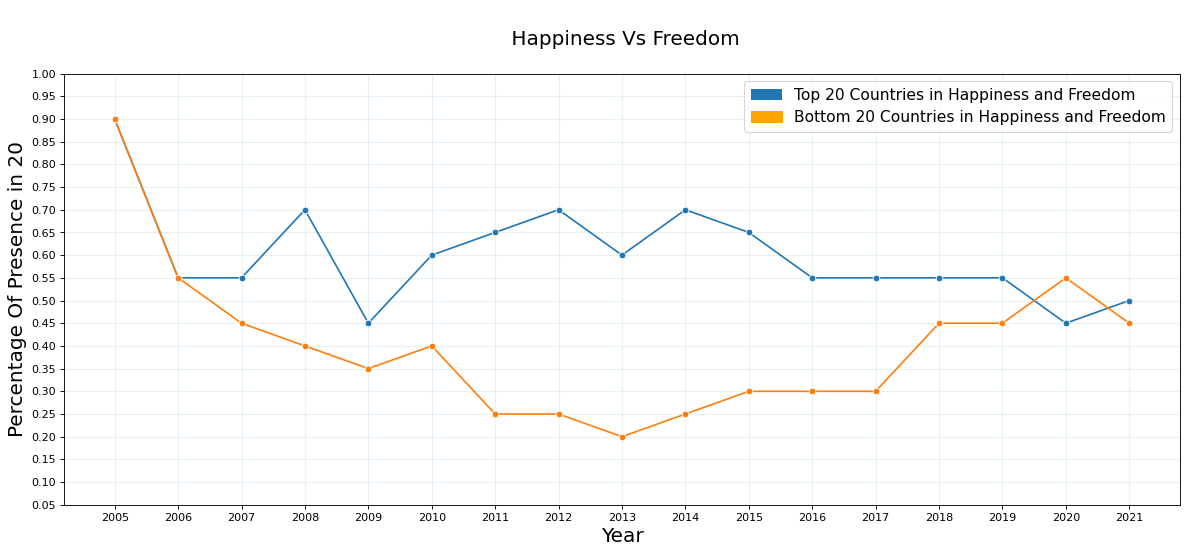

In [13]:
plot_Top_bottom(Freedom_Asce,Freedom_Desc,'Freedom')

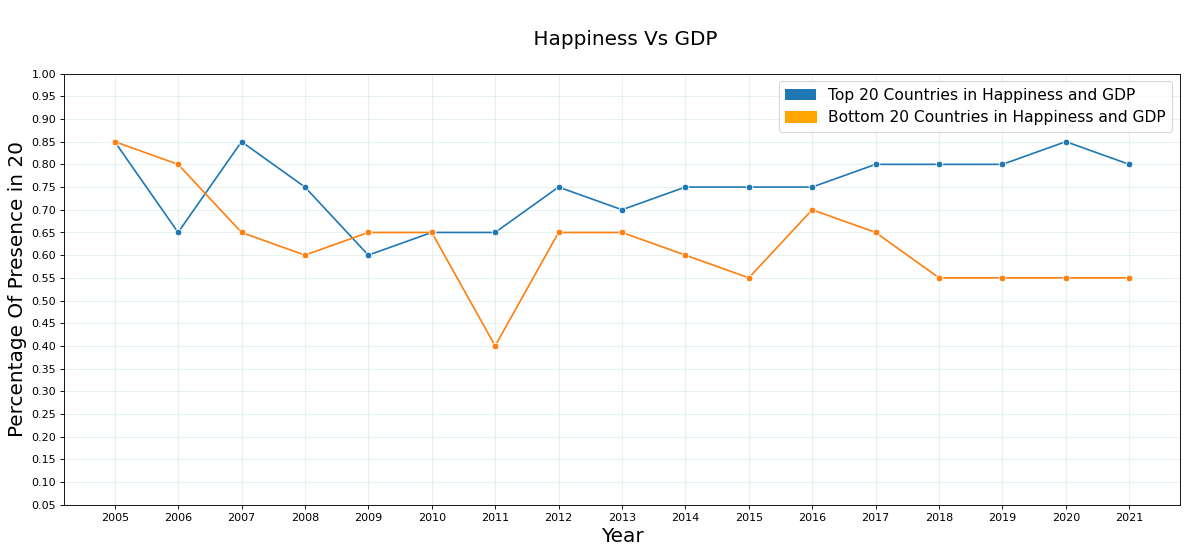

In [14]:
plot_Top_bottom(GDP_Asce,GDP_Desc,'GDP')

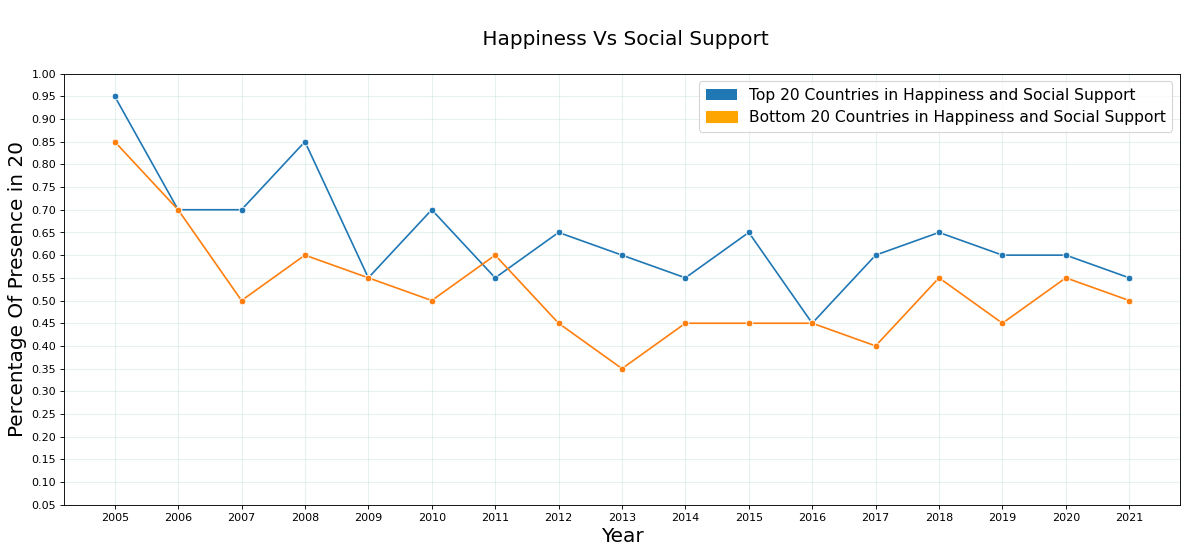

In [15]:
plot_Top_bottom(Social_Asce,Social_Desc,'Social Support')

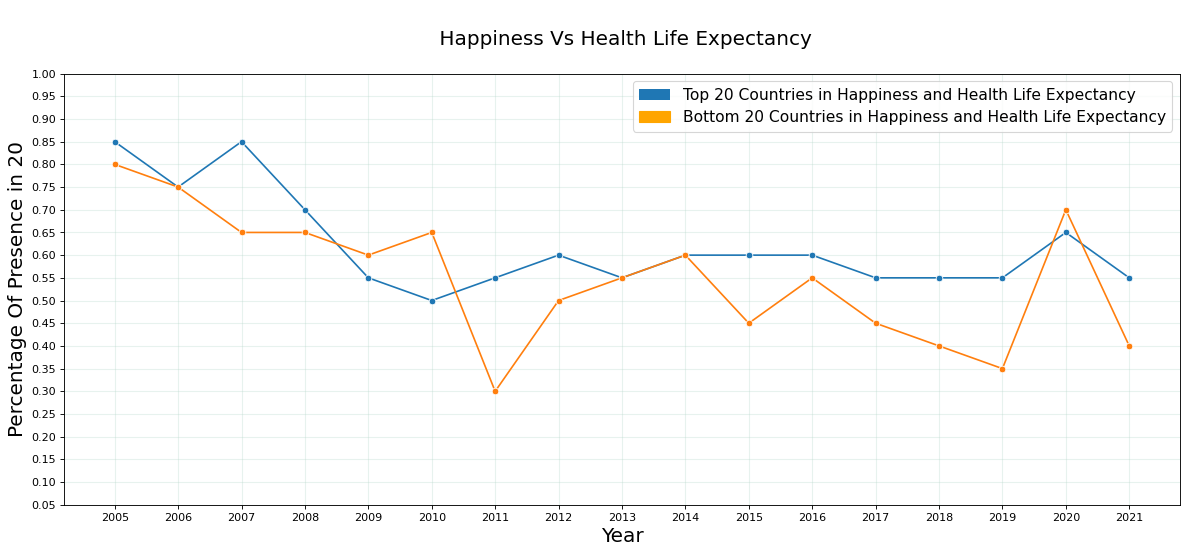

In [16]:
plot_Top_bottom(Health_Asce,Health_Desc,'Health Life Expectancy')

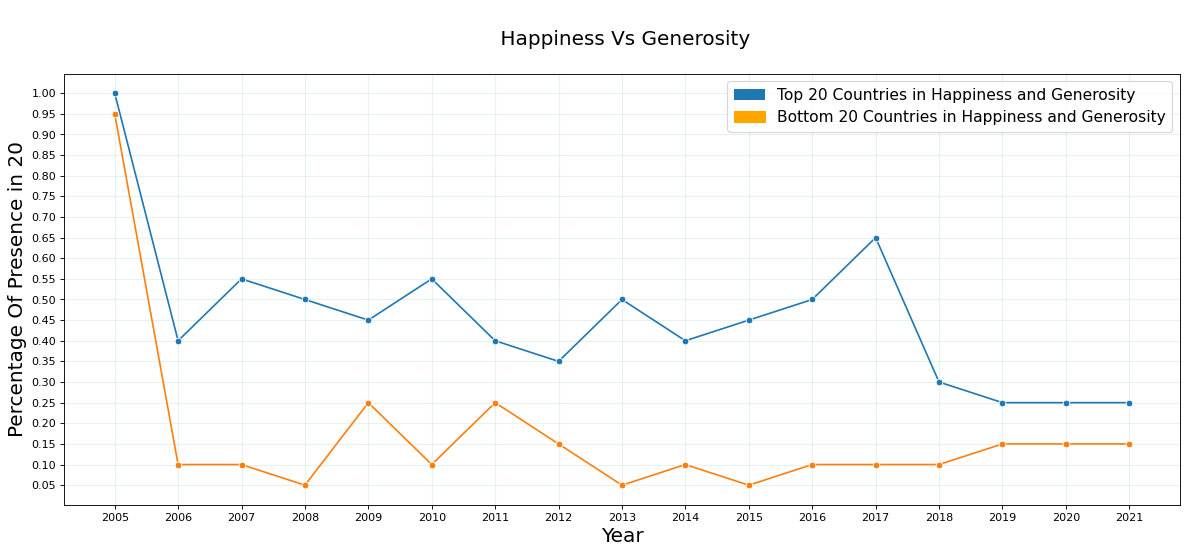

In [17]:
plot_Top_bottom(Generosity_Asce,Generosity_Desc,'Generosity')

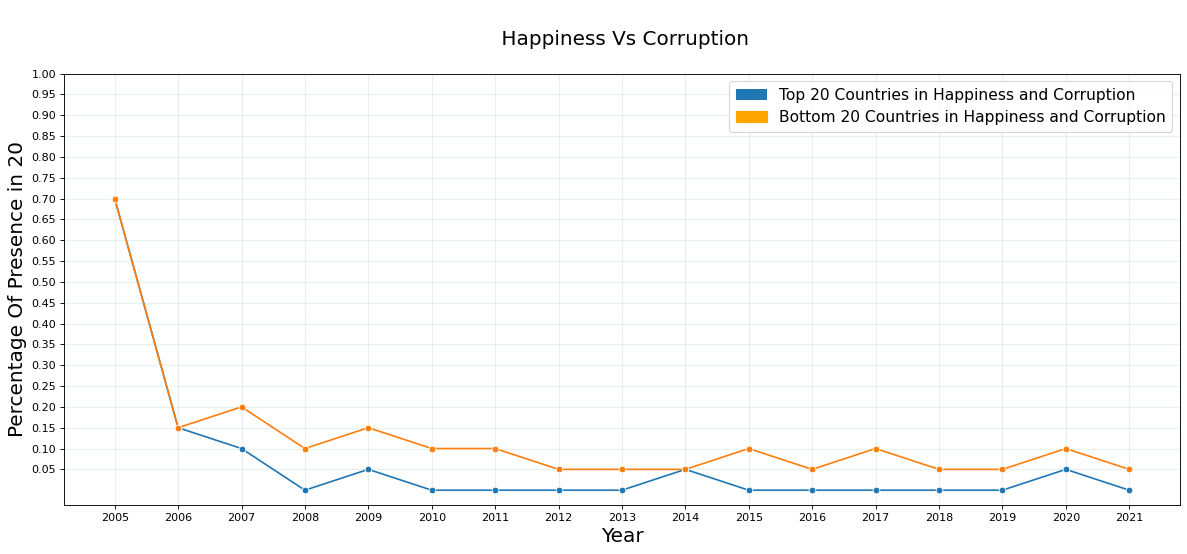

In [18]:
plot_Top_bottom(Corrup_Asce,Corrup_Desc,'Corruption')

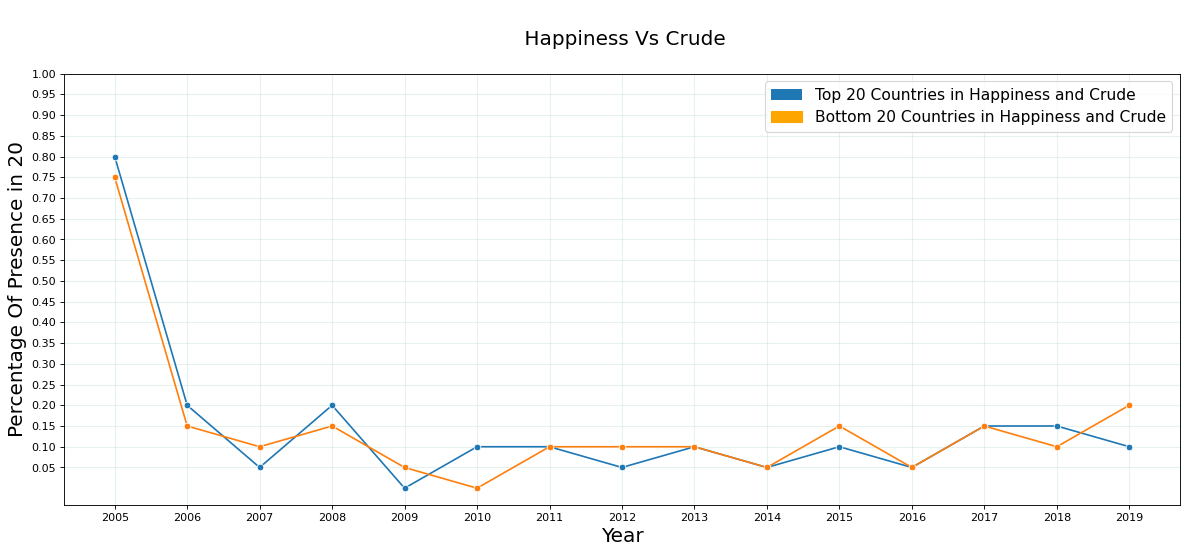

In [19]:
plot_Top_bottom(Crude_Asce,Crude_Desc,'Crude')

### Observations of Years

In [20]:
df_merged.year.value_counts()

2021    144
2017    139
2019    139
2018    138
2016    133
2014    133
2015    133
2011    132
2012    130
2013    128
2010    114
2009    105
2008    103
2007     97
2020     92
2006     84
2005     27
Name: year, dtype: int64

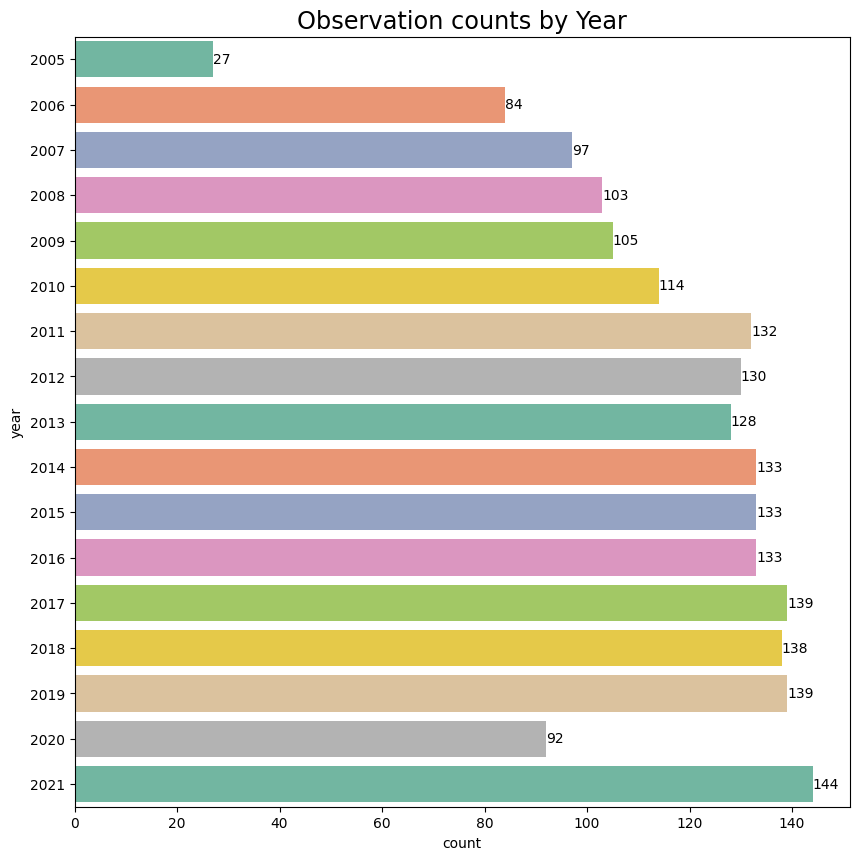

In [46]:
fig, ax = plt.subplots(figsize = (10,10))
plt.title('Observation counts by Year',fontsize = 'xx-large');
y = sns.countplot(data = df_merged,y ='year', ax = ax,palette=sns.color_palette('Set2', 16));
labels = [str(v) if v else '' for v in y.containers[0].datavalues.astype(int)]
y.bar_label(container=y.containers[0],labels = labels)
#fig.savefig("3_Extracted_Figures/Observation_counts_by_Year.png", dpi=200)
plt.show()

In [ ]:
marker=dict(colors=px.colors.qualitative.Plotly)

In [63]:
import chart_studio

chart_studio.tools.set_credentials_file(username='UsefGamal', api_key='GBrHR8rccuAp1q7GuaK8')

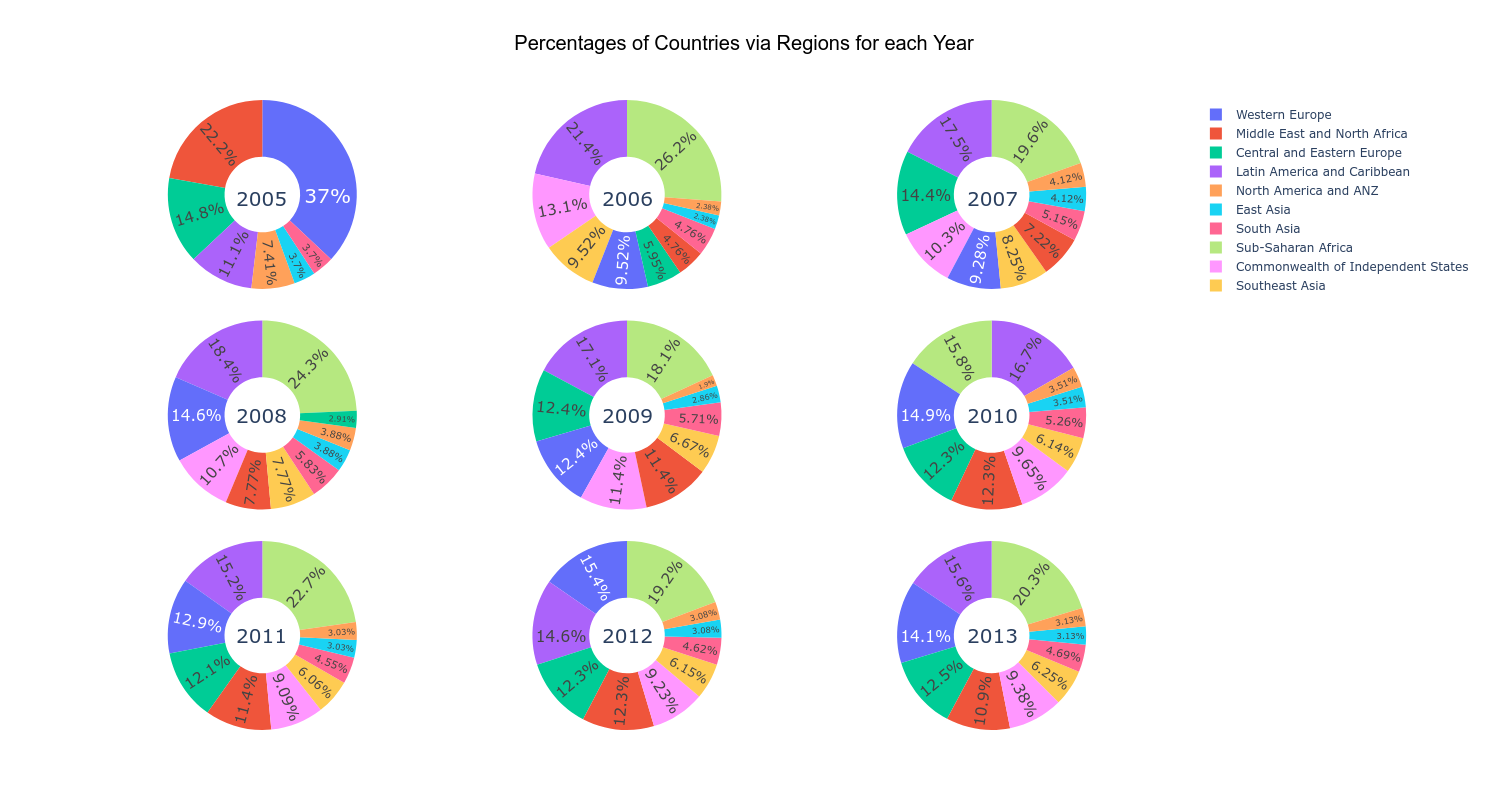

In [64]:
specs = [[{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
         [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
         [{'type':'domain'}, {'type':'domain'},{'type':'domain'}]]
subplot_names = ['2005','2006','2007','2008','2009','2010','2011','2012','2013']


fig = make_subplots(3, 3, specs=specs,horizontal_spacing=0,vertical_spacing=0.05)

fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2005].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2005].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    name='2005',domain=dict(x=[0, 0.5]),hole=0.4),row=1,col= 1)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2006].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2006].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    name='2006',domain=dict(x=[0, 0.5]),hole=0.4),row=1, col=2)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2007].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2007].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    name='2007',domain=dict(x=[0, 0.5]),hole=0.4),row=1,col= 3)


fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2008].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2008].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    name='2008',domain=dict(x=[0, 0.5]),hole=0.4),row=2,col= 1)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2009].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2009].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    name='2009',domain=dict(x=[0, 0.5]),hole=0.4),row=2,col= 2)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2010].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2010].groupby('Regional indicator')['Country name'].nunique().sort_values().index, 
    name='2010',domain=dict(x=[0, 0.5]),hole=0.4),row=2,col= 3)


fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2011].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2011].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    name='2011',domain=dict(x=[0, 0.5]),hole=0.4),row=3, col=1)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2012].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2012].groupby('Regional indicator')['Country name'].nunique().sort_values().index, 
    name='2012',domain=dict(x=[0, 0.5]),hole=0.4),row=3, col=2)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2013].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2013].groupby('Regional indicator')['Country name'].nunique().sort_values().index,
    name='2013',domain=dict(x=[0, 0.5]),hole=0.4),row=3,col= 3)


fig.update_traces(textposition='inside', textfont_size=20, textinfo='percent', insidetextorientation='radial')
fig.update_layout(height=810, width=1440,
                  annotations=[
                      dict(text='2005', x=0.14, y=0.870, font_size=20, showarrow=False),
                      dict(text='2006', x=0.50, y=0.870, font_size=20, showarrow=False),
                      dict(text='2007', x=0.86, y=0.870, font_size=20, showarrow=False),
                      
                      dict(text='2008', x=0.14, y=0.5, font_size=20, showarrow=False),
                      dict(text='2009', x=0.50, y=0.5, font_size=20, showarrow=False),
                      dict(text='2010', x=0.86, y=0.5, font_size=20, showarrow=False),
                      
                      dict(text='2011', x=0.14, y=0.125, font_size=20, showarrow=False),
                      dict(text='2012', x=0.50, y=0.125, font_size=20, showarrow=False),
                      dict(text='2013', x=0.86, y=0.125, font_size=20, showarrow=False)],
                  
                  title={
    "text": "Percentages of Countries via Regions for each Year",
    "x":0.5,
    "xanchor": "center",
    "font": {"size": 20, "color": "black", "family": "Arial"}})

fig.show()


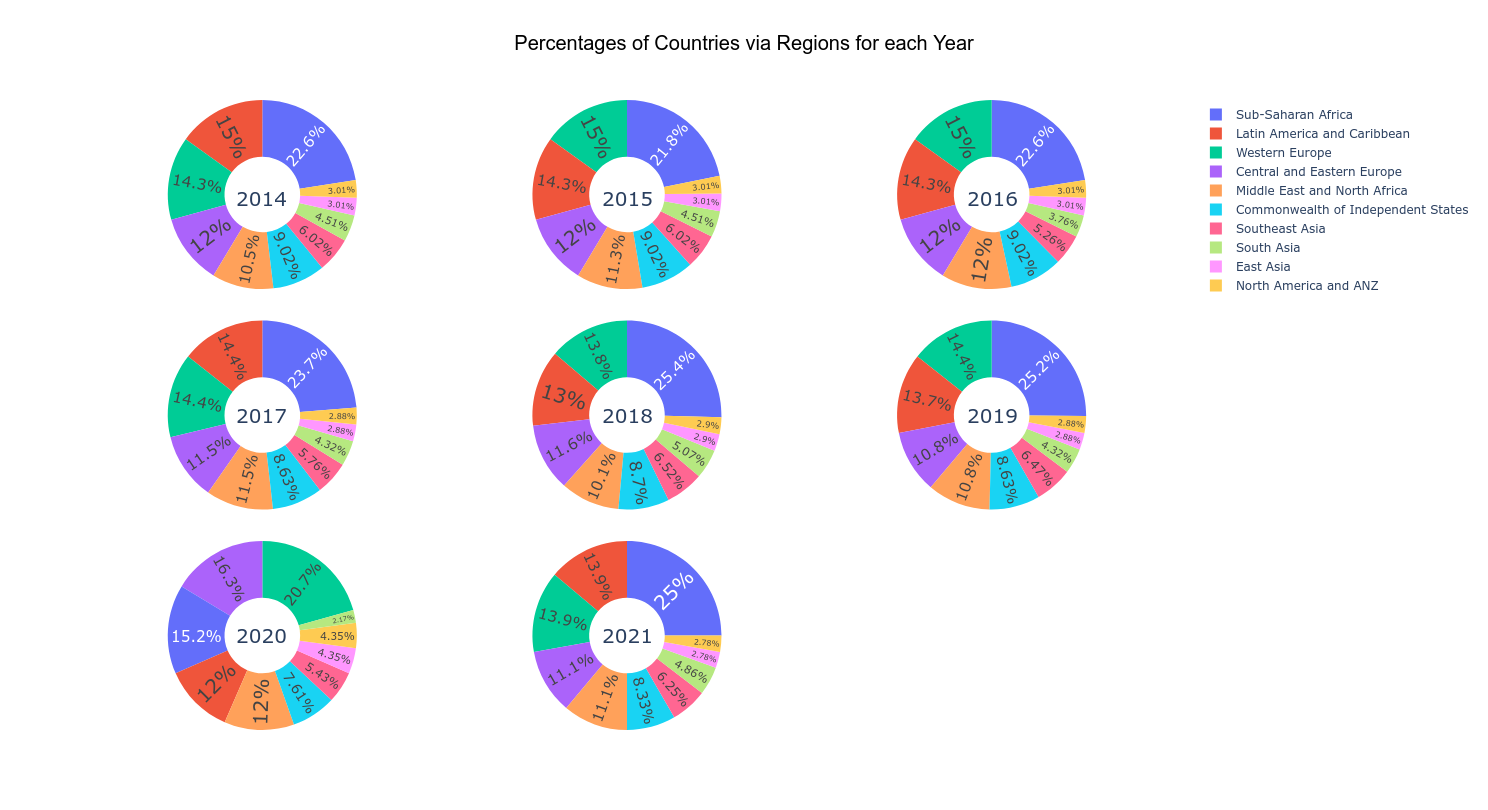

In [65]:
specs = [[{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
         [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
         [{'type':'domain'}, {'type':'domain'},{'type':'domain'}]]
subplot_names = ['2014','2015','2016','2017','2018','2019','2020','2021']

fig = make_subplots(3, 3, specs=specs,horizontal_spacing=0,vertical_spacing=0.05)

fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2014].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2014].groupby('Regional indicator')['Country name'].nunique().sort_values().index, domain=dict(x=[0, 0.5]),hole=0.4),row=1,col= 1)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2015].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2015].groupby('Regional indicator')['Country name'].nunique().sort_values().index, domain=dict(x=[0, 0.5]),hole=0.4),row=1,col= 2)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2016].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2016].groupby('Regional indicator')['Country name'].nunique().sort_values().index, domain=dict(x=[0, 0.5]),hole=0.4),row=1,col= 3)

fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2017].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2017].groupby('Regional indicator')['Country name'].nunique().sort_values().index, domain=dict(x=[0, 0.5]),hole=0.4),row=2,col= 1)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2018].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2018].groupby('Regional indicator')['Country name'].nunique().sort_values().index, domain=dict(x=[0, 0.5]),hole=0.4),row=2,col= 2)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2019].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2019].groupby('Regional indicator')['Country name'].nunique().sort_values().index, domain=dict(x=[0, 0.5]),hole=0.4),row=2,col= 3)

fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2020].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2020].groupby('Regional indicator')['Country name'].nunique().sort_values().index, domain=dict(x=[0, 0.5]),hole=0.4),row=3,col= 1)
fig.add_trace( go.Pie(
    values=df_merged[df_merged['year']==2021].groupby('Regional indicator',group_keys=True)['Country name'].nunique().sort_values().values,
    labels=df_merged[df_merged['year']==2021].groupby('Regional indicator')['Country name'].nunique().sort_values().index, domain=dict(x=[0, 0.5]),hole=0.4),row=3,col= 2)

fig.update_traces(textposition='inside', textfont_size=20, textinfo='percent', insidetextorientation='radial')
fig.update_layout(height=810, width=1440,
                  annotations=[
                      dict(text='2014', x=0.14, y=0.870, font_size=20, showarrow=False),
                      dict(text='2015', x=0.50, y=0.870, font_size=20, showarrow=False),
                      dict(text='2016', x=0.86, y=0.870, font_size=20, showarrow=False),
                      
                      dict(text='2017', x=0.14, y=0.5, font_size=20, showarrow=False),
                      dict(text='2018', x=0.50, y=0.5, font_size=20, showarrow=False),
                      dict(text='2019', x=0.86, y=0.5, font_size=20, showarrow=False),
                      
                      dict(text='2020', x=0.14, y=0.125, font_size=20, showarrow=False),
                      dict(text='2021', x=0.50, y=0.125, font_size=20, showarrow=False)],
                  title={
    "text": "Percentages of Countries via Regions for each Year",
    "x":0.5,
    "xanchor": "center",
    "font": {"size": 20, "color": "black", "family": "Arial"}})

fig.show()

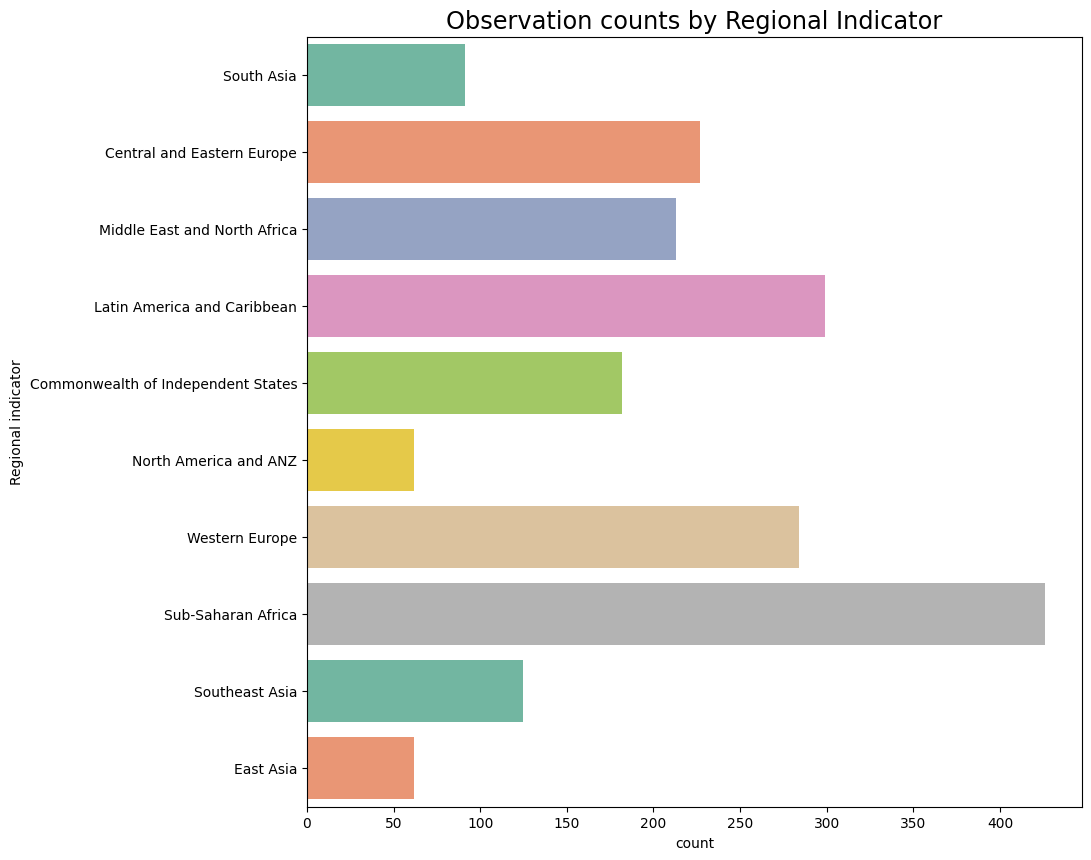

In [66]:
fig, ax = plt.subplots(figsize = (10,10))
plt.title('Observation counts by Regional Indicator',fontsize = 'xx-large');
sns.countplot(data = df_merged,y = 'Regional indicator' , ax = ax,palette='Set2');
fig.savefig("4_Extracted_Figures/Observation_counts_by_Regional_Indicator.png", dpi=200)
plt.show()

In [103]:
df_WHR_sui_merg[df_WHR_sui_merg['Regional indicator']== 'Commonwealth of Independent States'] ['Country name'].unique()

array(['Armenia', 'Azerbaijan', 'Belarus', 'Georgia', 'Kazakhstan',
       'Kyrgyz Republic', 'Moldova', 'Russia', 'Tajikistan',
       'Turkmenistan', 'Ukraine', 'Uzbekistan'], dtype=object)

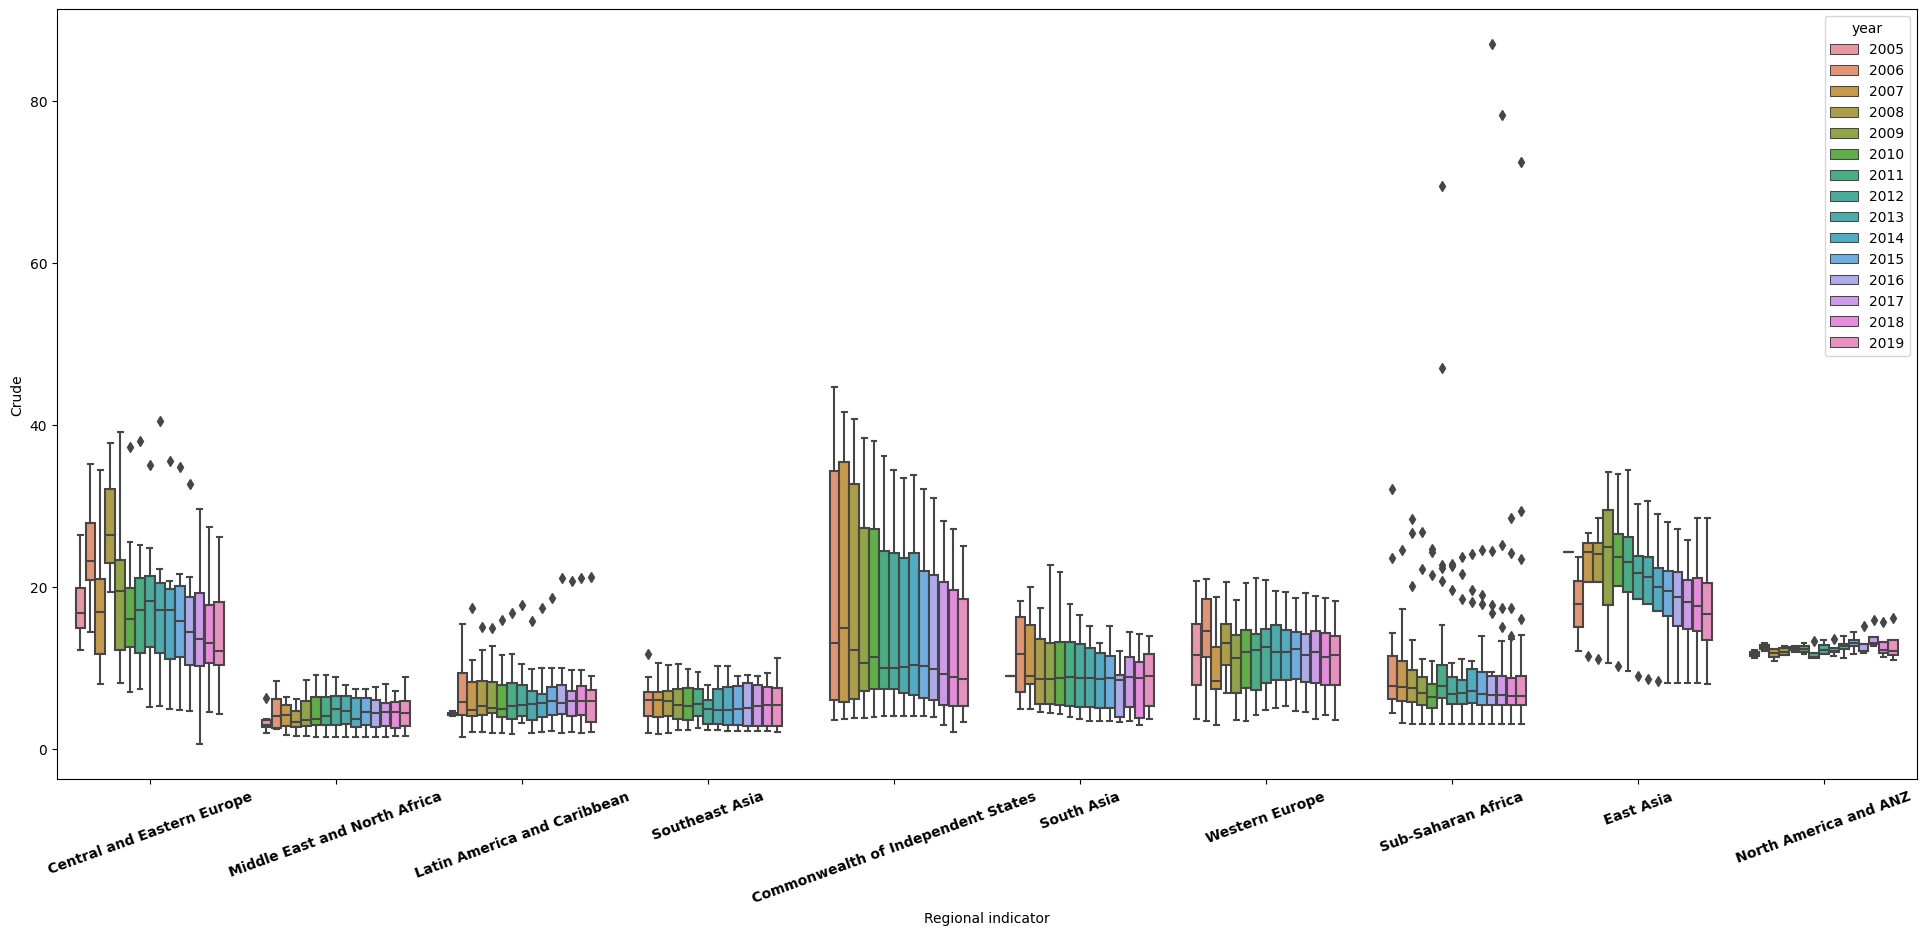

In [102]:
fig,ax = plt.subplots(figsize = (24,10))
sns.boxplot(data = df_WHR_sui_merg.sort_values('Crude',ascending=True),x = 'Regional indicator', y = 'Crude',hue='year', ax = ax)
plt.xticks(rotation=20, fontweight="bold")
plt.show()

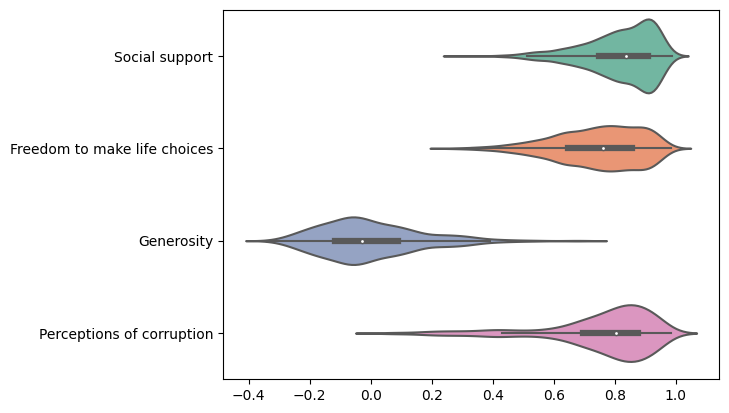

In [67]:
list_features = ["Social support", "Freedom to make life choices",
                 "Generosity",
                 "Perceptions of corruption"
                ]
sns.violinplot(data=df_WHR_sui_merg.loc[:, list_features], orient="h",palette='Set2')

plt.show()

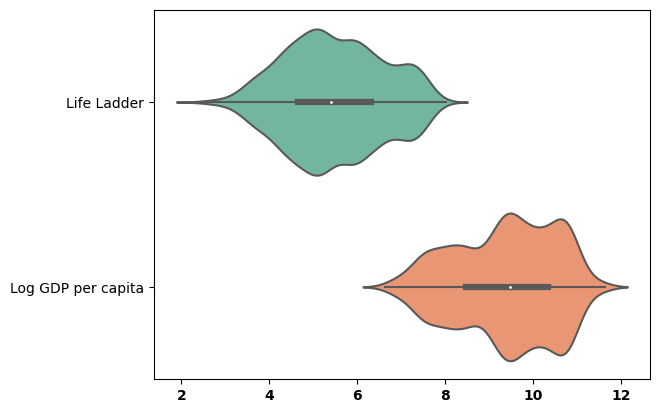

In [68]:
list_features = ["Life Ladder", "Log GDP per capita"]
sns.violinplot(data=df_merged.loc[:, list_features], orient="h", palette="Set2")
plt.xticks(fontweight="bold")
plt.show()

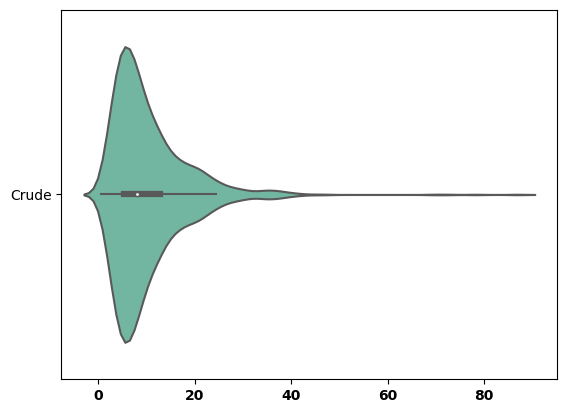

In [69]:

list_features = ["Crude"]
sns.violinplot(data=df_WHR_sui_merg.loc[:, list_features], orient="h", palette="Set2")
plt.xticks(fontweight="bold")
plt.show()

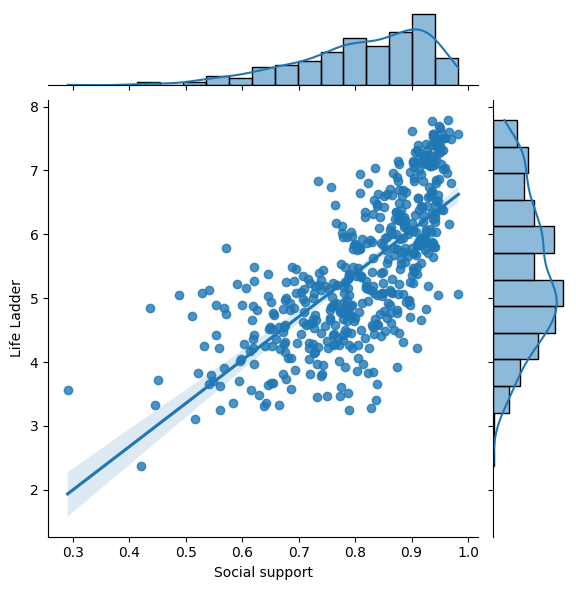

In [70]:
sns.jointplot(x='Social support',y='Life Ladder',data=df_merged.sample(frac=0.25,random_state=1)
,kind='reg',palette='Set2')

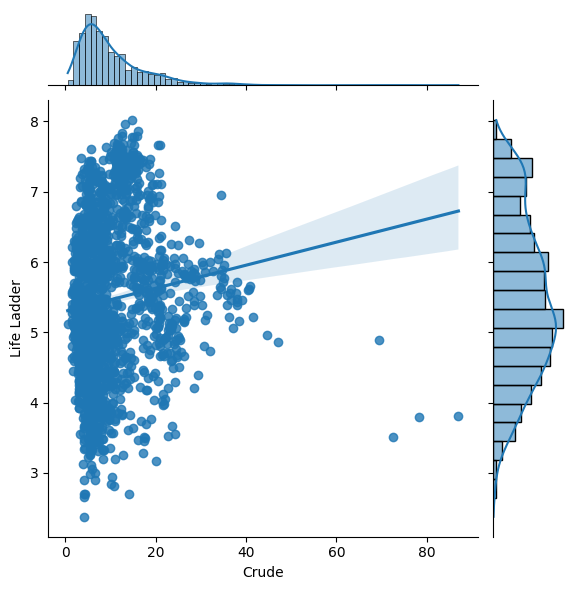

In [71]:
sns.jointplot(x='Crude',y='Life Ladder',data=df_WHR_sui_merg,kind='reg',palette='Set2')

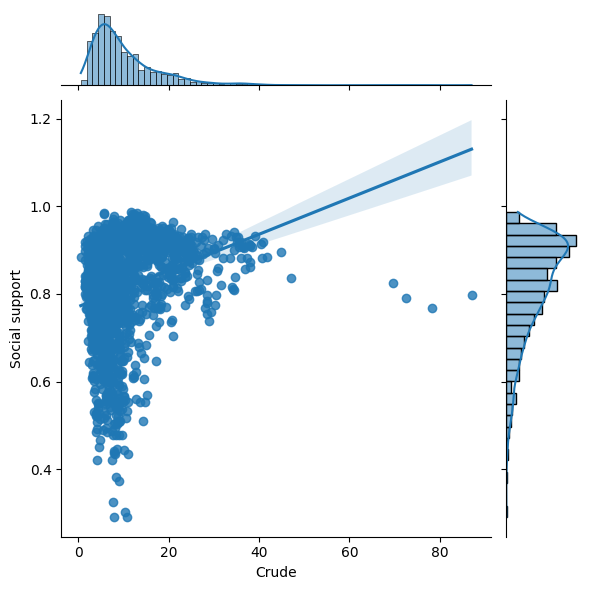

In [72]:
sns.jointplot(x='Crude',y='Social support',data=df_WHR_sui_merg,kind='reg',palette='Set2')

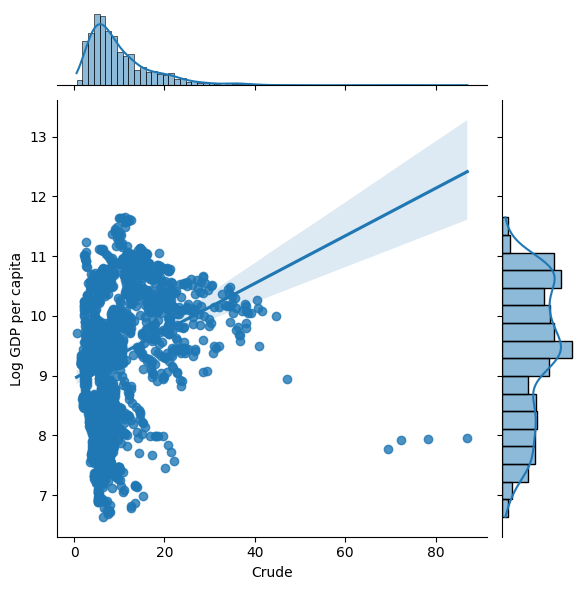

In [73]:
sns.jointplot(x='Crude',y='Log GDP per capita',data=df_WHR_sui_merg,kind='reg',palette='Set2')

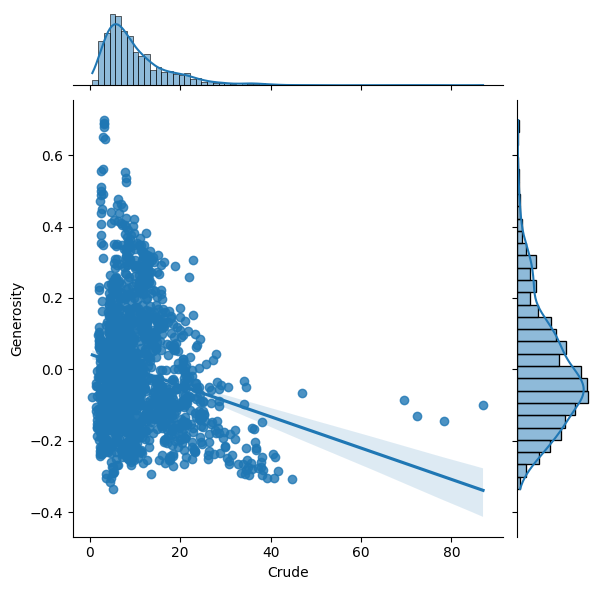

In [74]:
sns.jointplot(x='Crude',y='Generosity',data=df_WHR_sui_merg,kind='reg',palette='Set2')

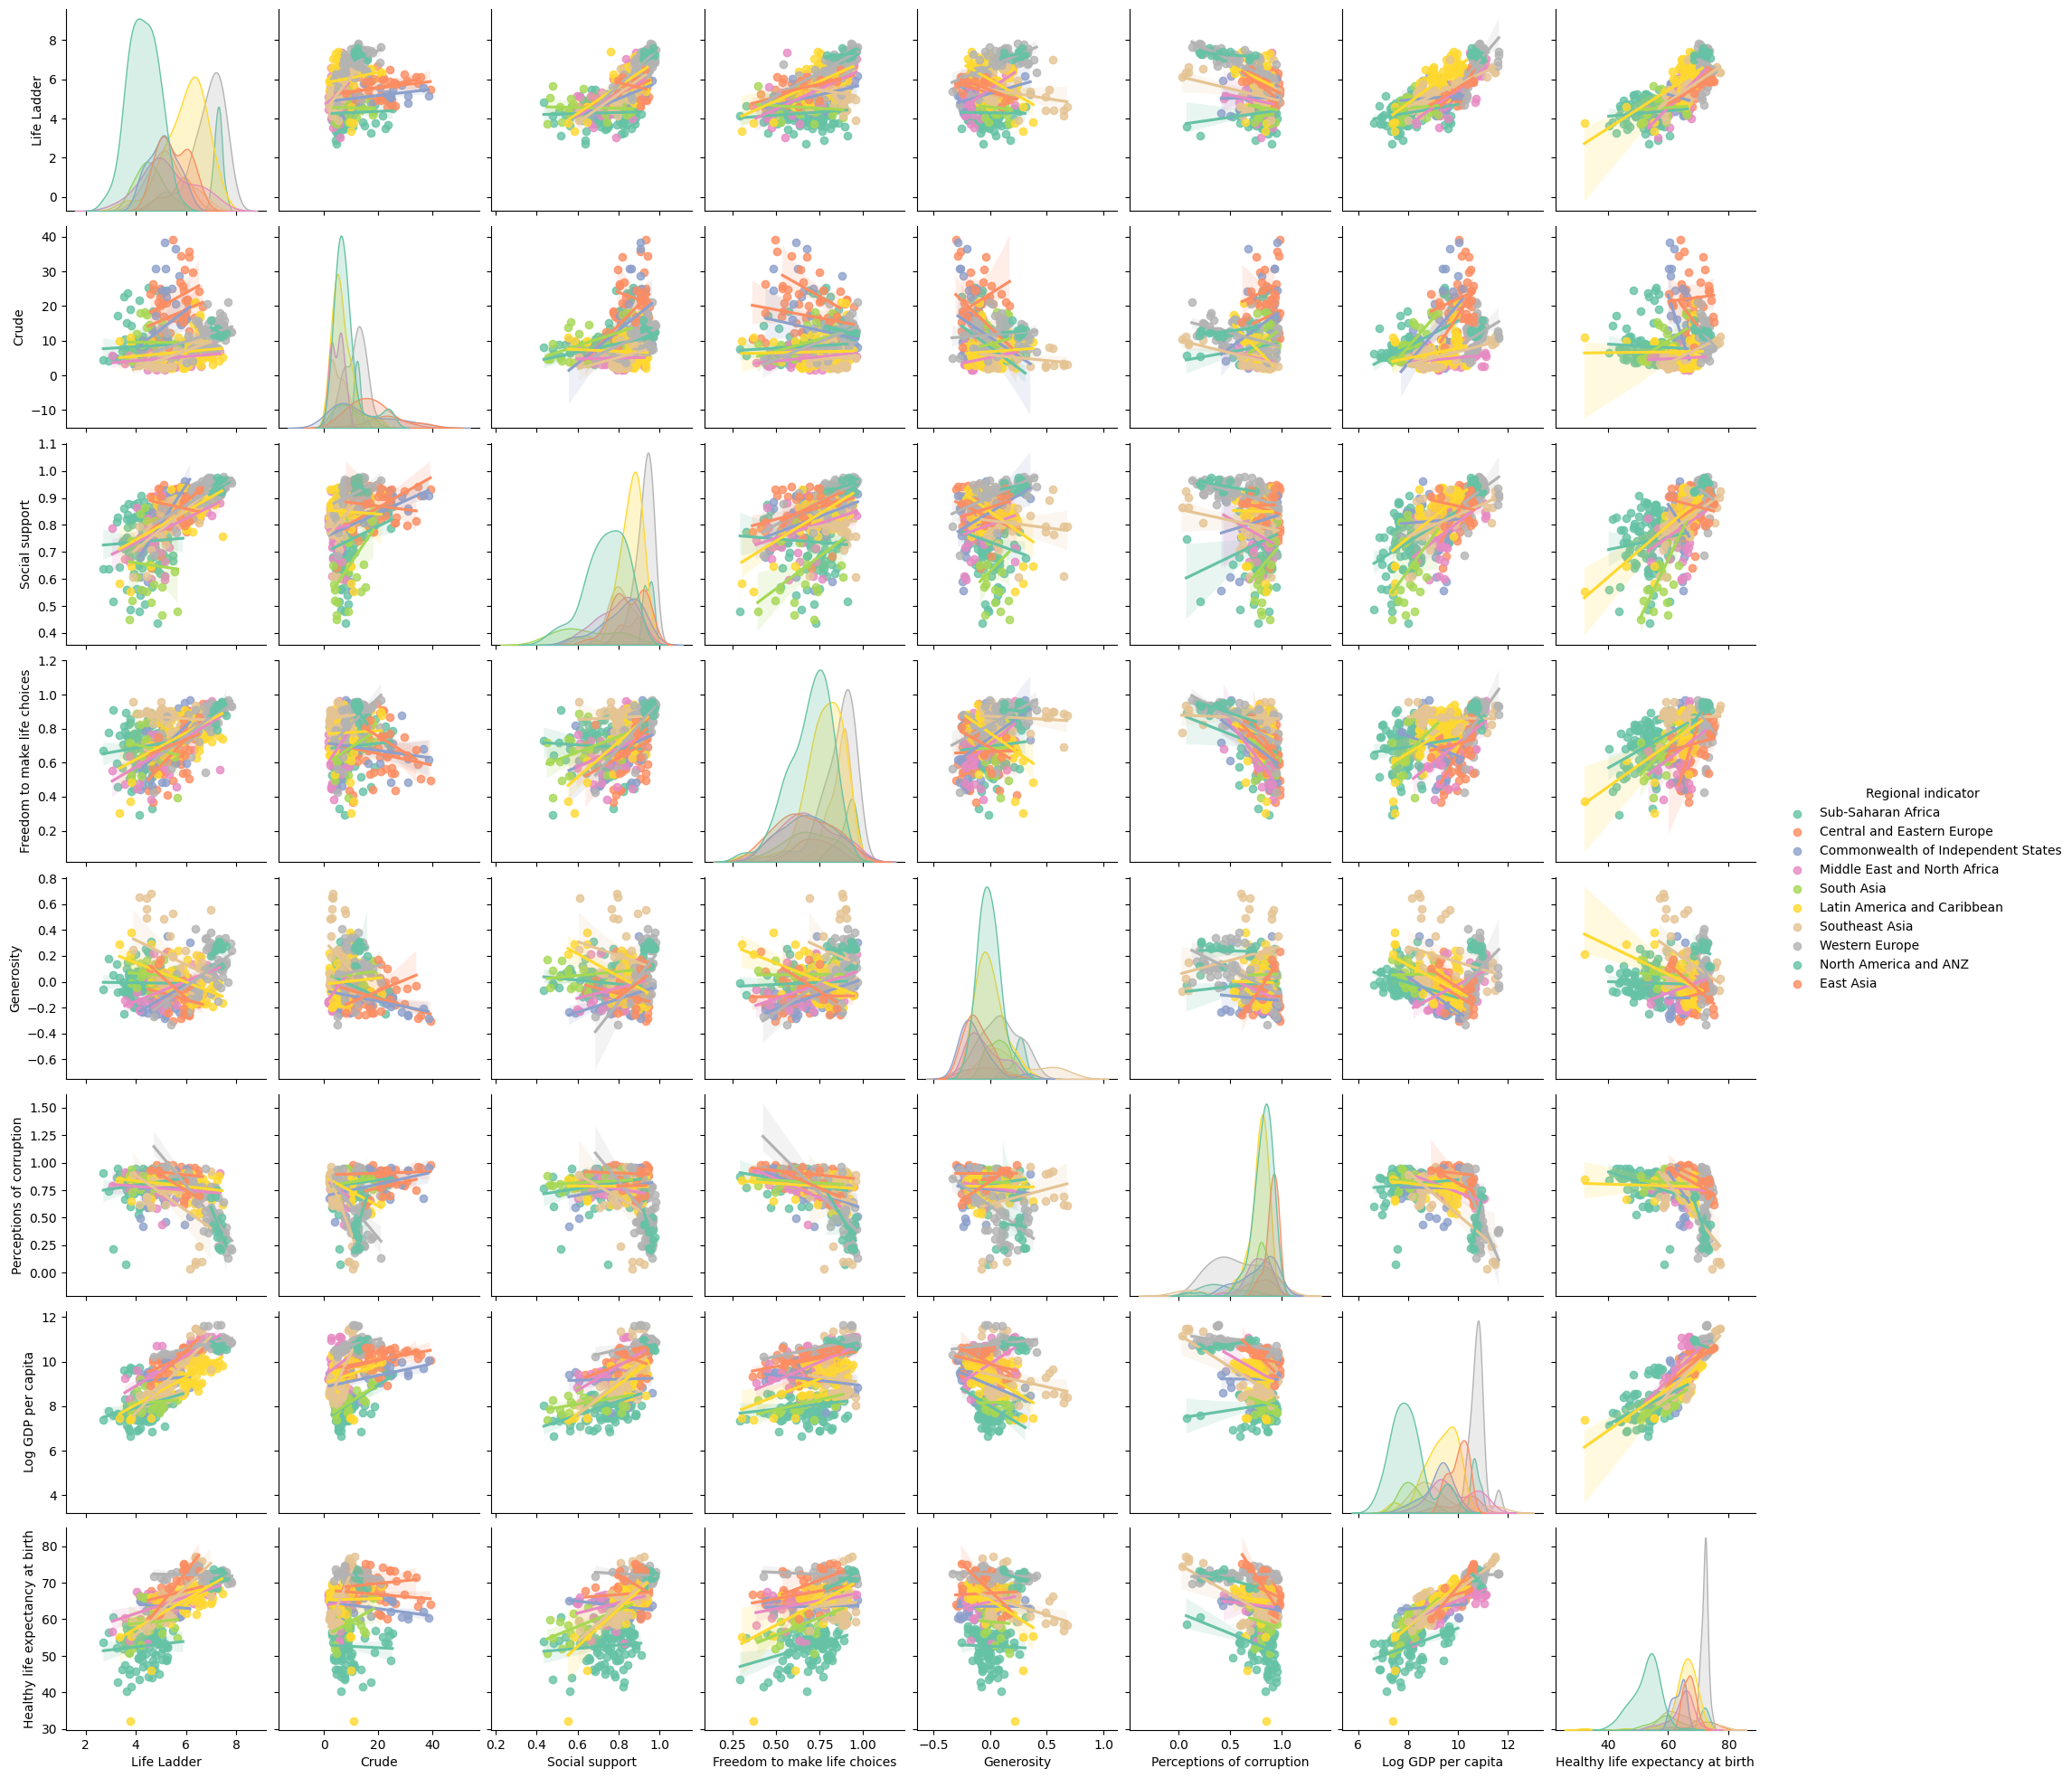

In [75]:
list_features = ["Life Ladder",
                 "Crude",
                 "Social support",
                 "Freedom to make life choices",
                 "Generosity",
                 "Perceptions of corruption",
                 "Log GDP per capita",
                 "Healthy life expectancy at birth",
                 "Regional indicator"
                 ]

sns.pairplot(df_WHR_sui_merg.loc[:, list_features].sample(frac=0.25,random_state=1),hue ='Regional indicator' ,kind='reg',palette='Set2')

<AxesSubplot: xlabel='Life Ladder', ylabel='Regional indicator'>

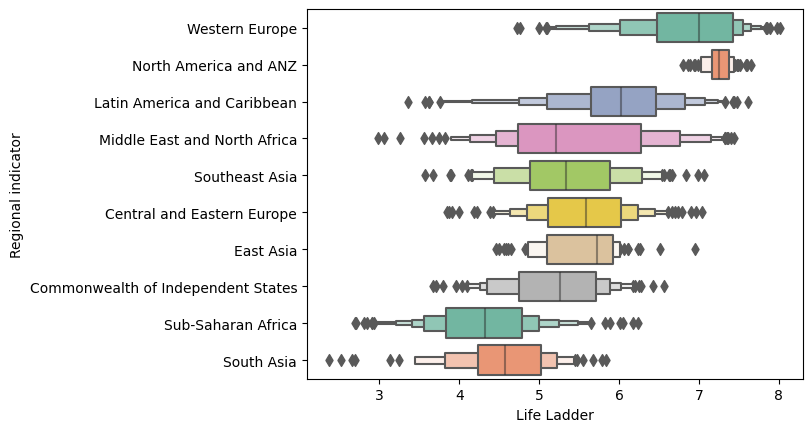

In [76]:
sns.boxenplot(y="Regional indicator",x="Life Ladder",data=df_merged.sort_values('Life Ladder',ascending=False),palette='Set2' )

<AxesSubplot: xlabel='Crude', ylabel='Regional indicator'>

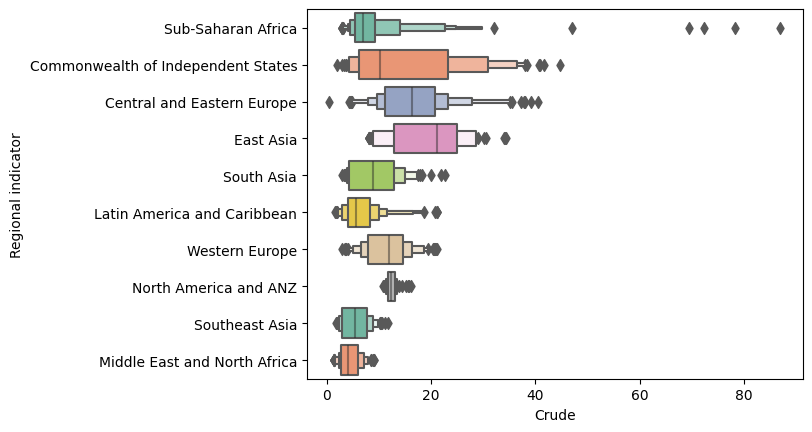

In [77]:
sns.boxenplot(y="Regional indicator",x="Crude",data=df_WHR_sui_merg.sort_values('Crude',ascending=False),palette='Set2' )

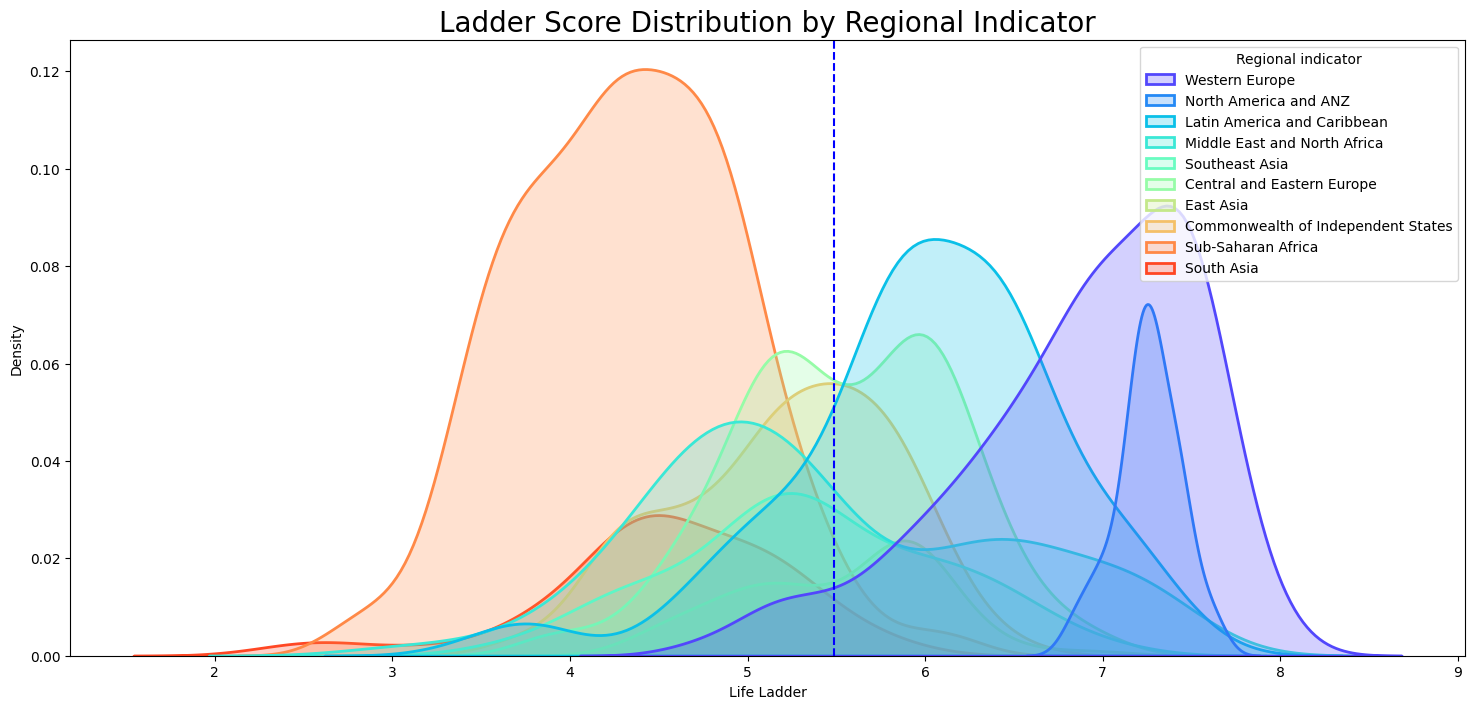

In [78]:
plt.figure(figsize=(18,8))
sns.kdeplot(data=df_merged.sort_values('Life Ladder',ascending=False), x="Life Ladder", hue="Regional indicator", fill=True, linewidth=2,palette='rainbow')
plt.axvline(df_merged["Life Ladder"].mean(), linestyle="--", color="blue", label="Ladder Mean")
plt.title("Ladder Score Distribution by Regional Indicator",fontsize = 20)
plt.show()

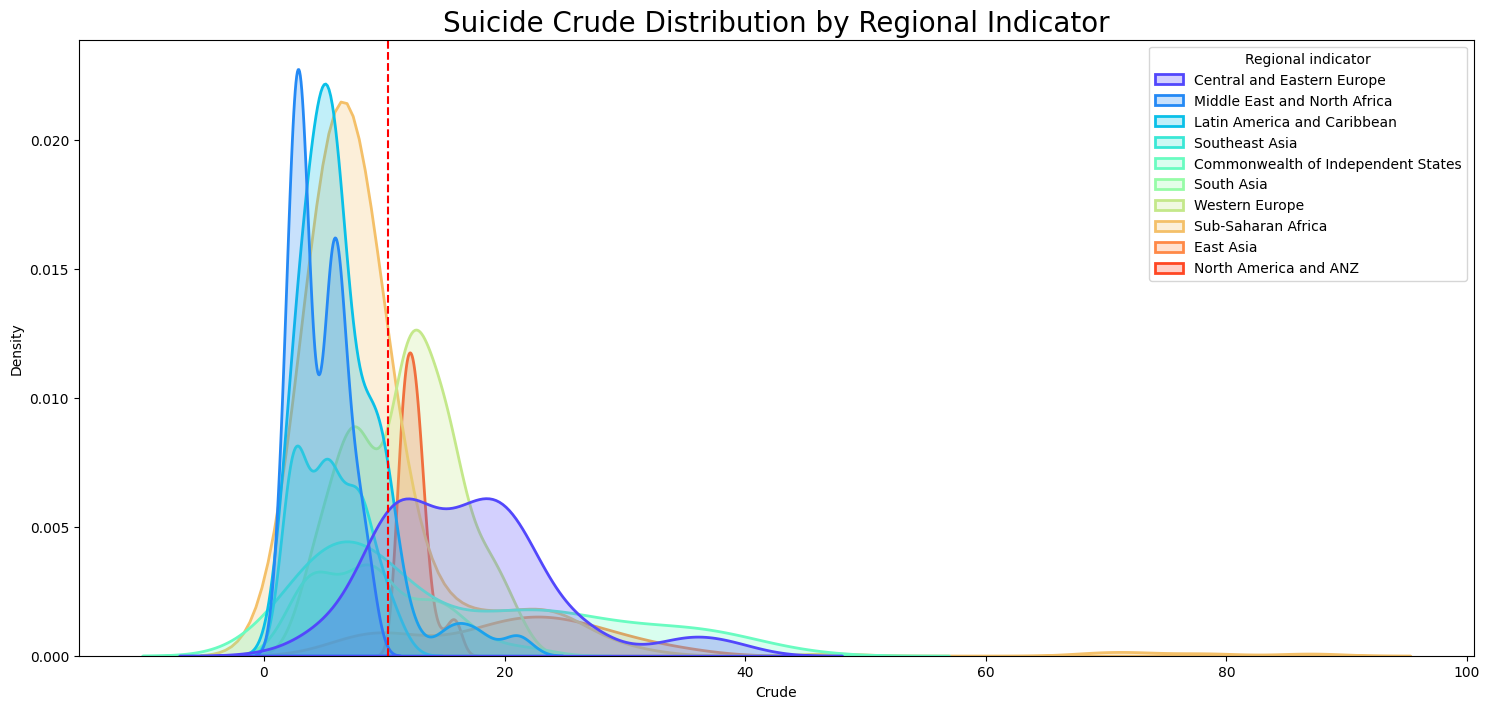

In [79]:
plt.figure(figsize=(18,8))
sns.kdeplot(data=df_WHR_sui_merg.sort_values('Crude',ascending=True), x="Crude", hue="Regional indicator", fill=True, linewidth=2,palette='rainbow')
plt.axvline(df_WHR_sui_merg["Crude"].mean(), linestyle="--", color="red", label="Crude Mean")
plt.title("Suicide Crude Distribution by Regional Indicator",fontsize = 20)
plt.show()

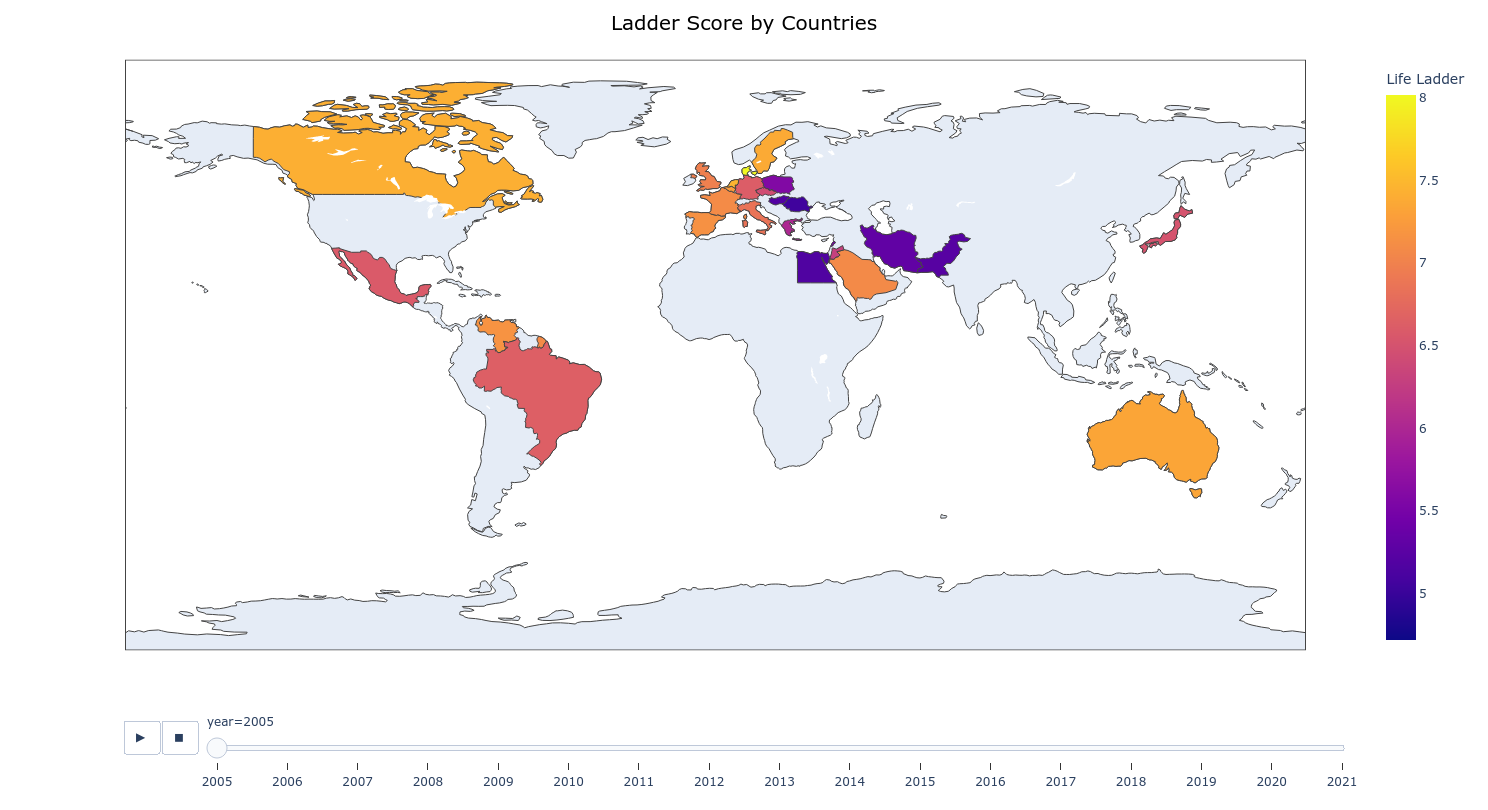

In [80]:
fig = px.choropleth(df_merged.sort_values("year"),
                   locations="Country name",
                   color="Life Ladder",
                   locationmode="country names",
                   animation_frame="year",
                   width=1440,height=810)

fig.update_layout(title={
    "text": "Ladder Score by Countries",
    "x":0.5,
    "xanchor": "center",
    "font": {"size": 20, "color": "black"}
})

fig.show()

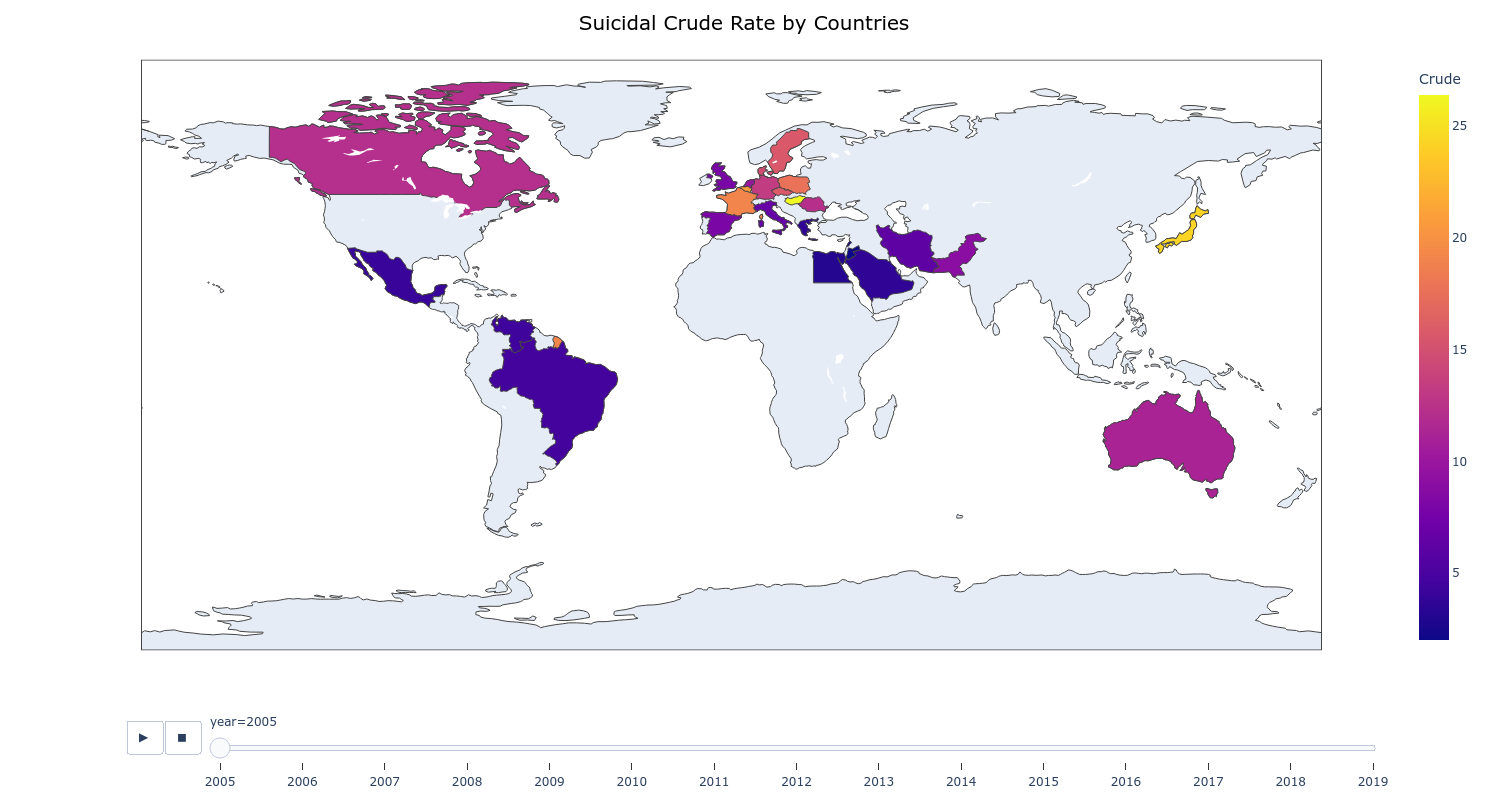

In [81]:
fig = px.choropleth(df_WHR_sui_merg.sort_values("year"),
                   locations="Country name",
                   color="Crude",
                   locationmode="country names",
                   animation_frame="year",
                   width=1440,height=810)

fig.update_layout(title={
    "text": "Suicidal Crude Rate by Countries",
    "x":0.5,
    "xanchor": "center",
    "font": {"size": 20, "color": "black"}
})

fig.show()

In [82]:
df_merged.sort_values("year")["Log GDP per capita"].values.astype(int)

array([10, 10,  9, ...,  6,  7,  7])

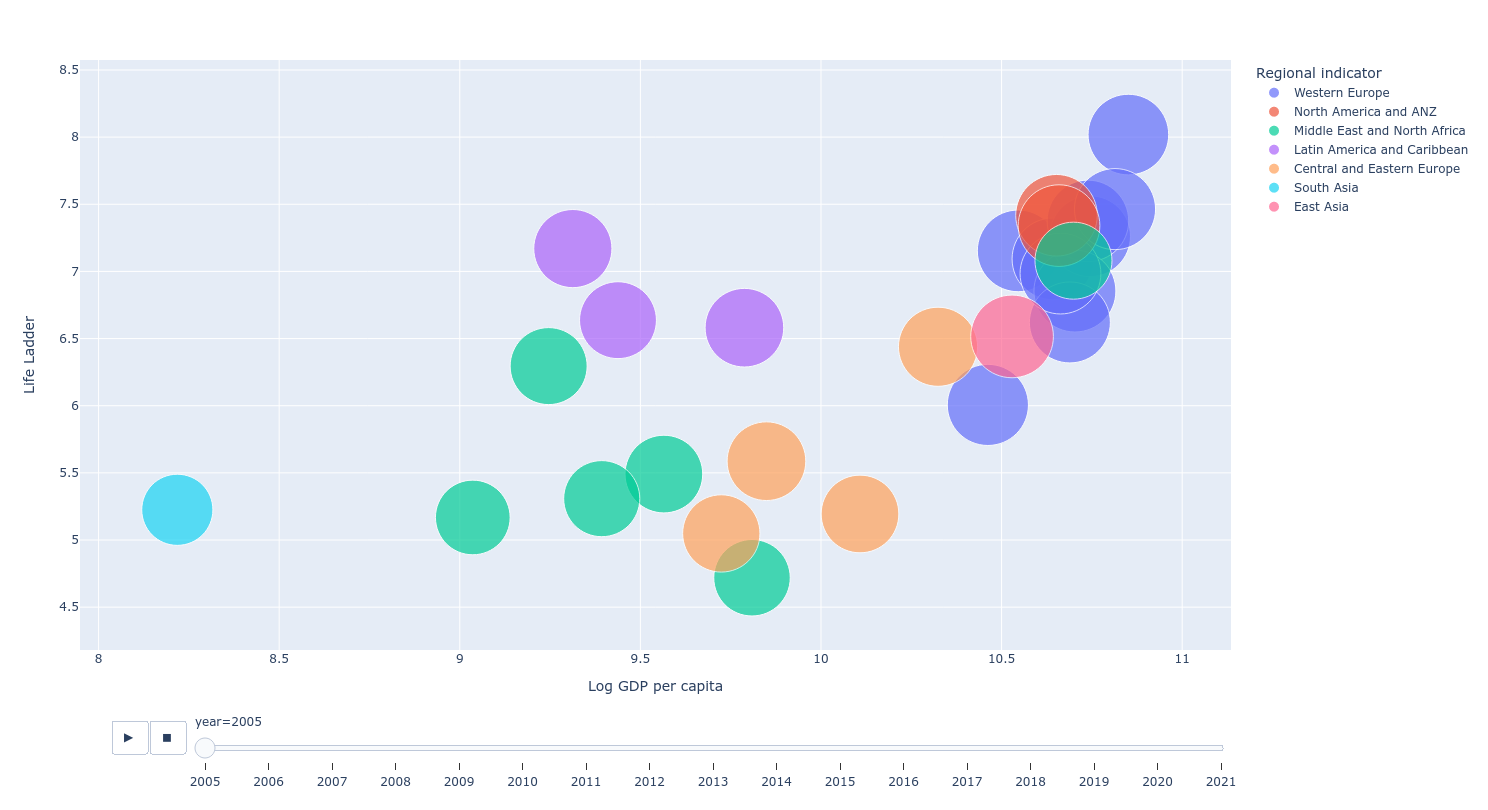

In [83]:
fig = px.scatter(df_merged.sort_values("year"),
                x="Log GDP per capita",
                y="Life Ladder",
                animation_frame="year",
                animation_group="Country name",
                color="Regional indicator",
                hover_name="Country name",
                size_max=60,
                size="Healthy life expectancy at birth",
                width=1440,height=810)

fig.update_layout(title={
    "text": "Life Ladder and Log GDP per capita Comparison by Countries via Regions for each Year",
    "x":0.5,
    "xanchor": "center",
    "font": {"size": 20, "color": "white", "family": "Arial"}
})


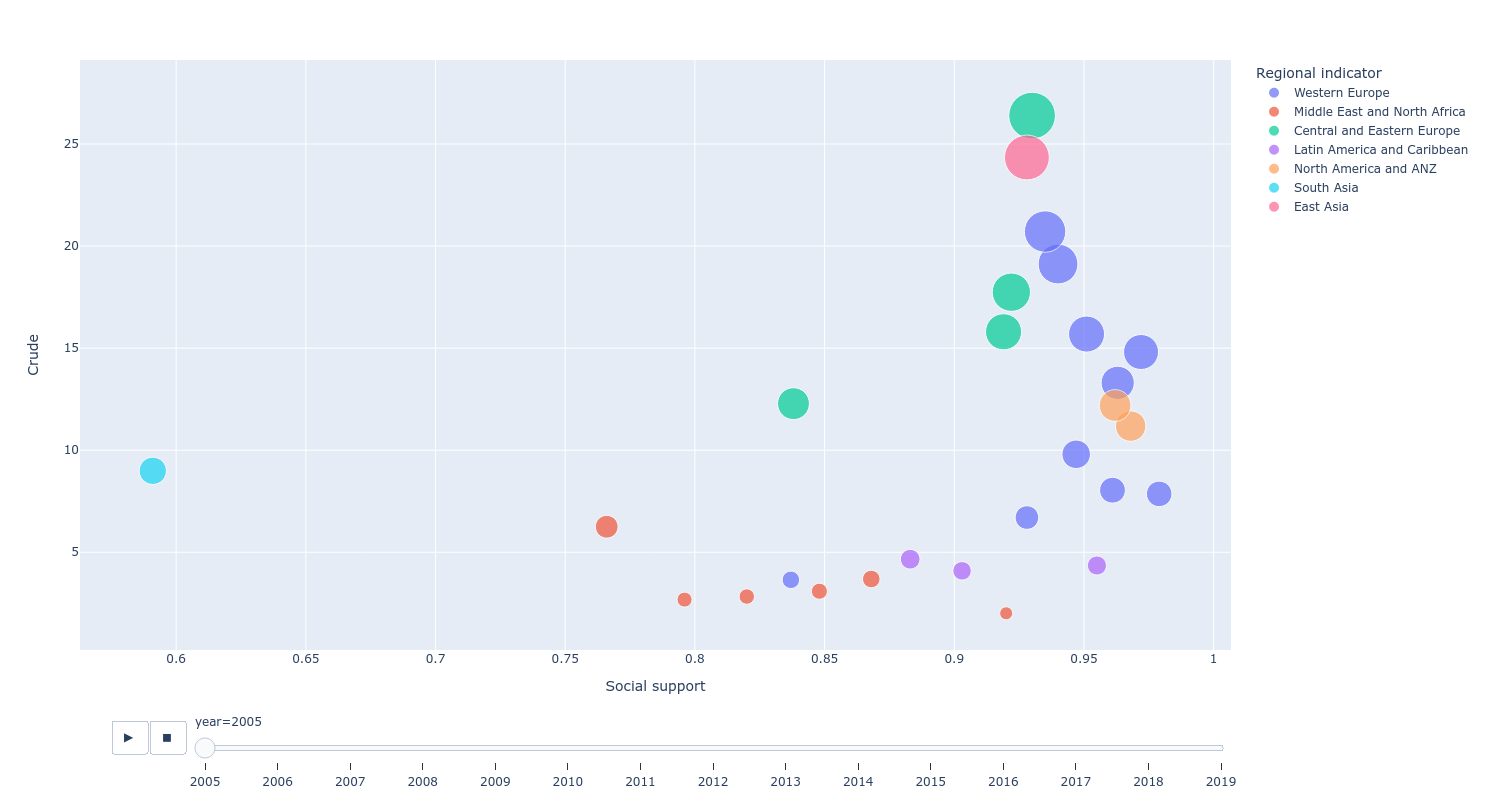

In [84]:
fig = px.scatter(df_WHR_sui_merg.sort_values("year"),
                x="Social support",
                y="Crude",
                animation_frame="year",
                animation_group="Country name",
                color="Regional indicator",
                hover_name="Country name",
                size_max=60,
                size="Crude",
                width=1440,height=810)

fig.update_layout(title={
    "text": "Life Ladder and Log GDP per capita Comparison by Countries via Regions for each Year",
    "x":0.5,
    "xanchor": "center",
    "font": {"size": 20, "color": "white", "family": "Arial"}
})


## Relationship Between Features

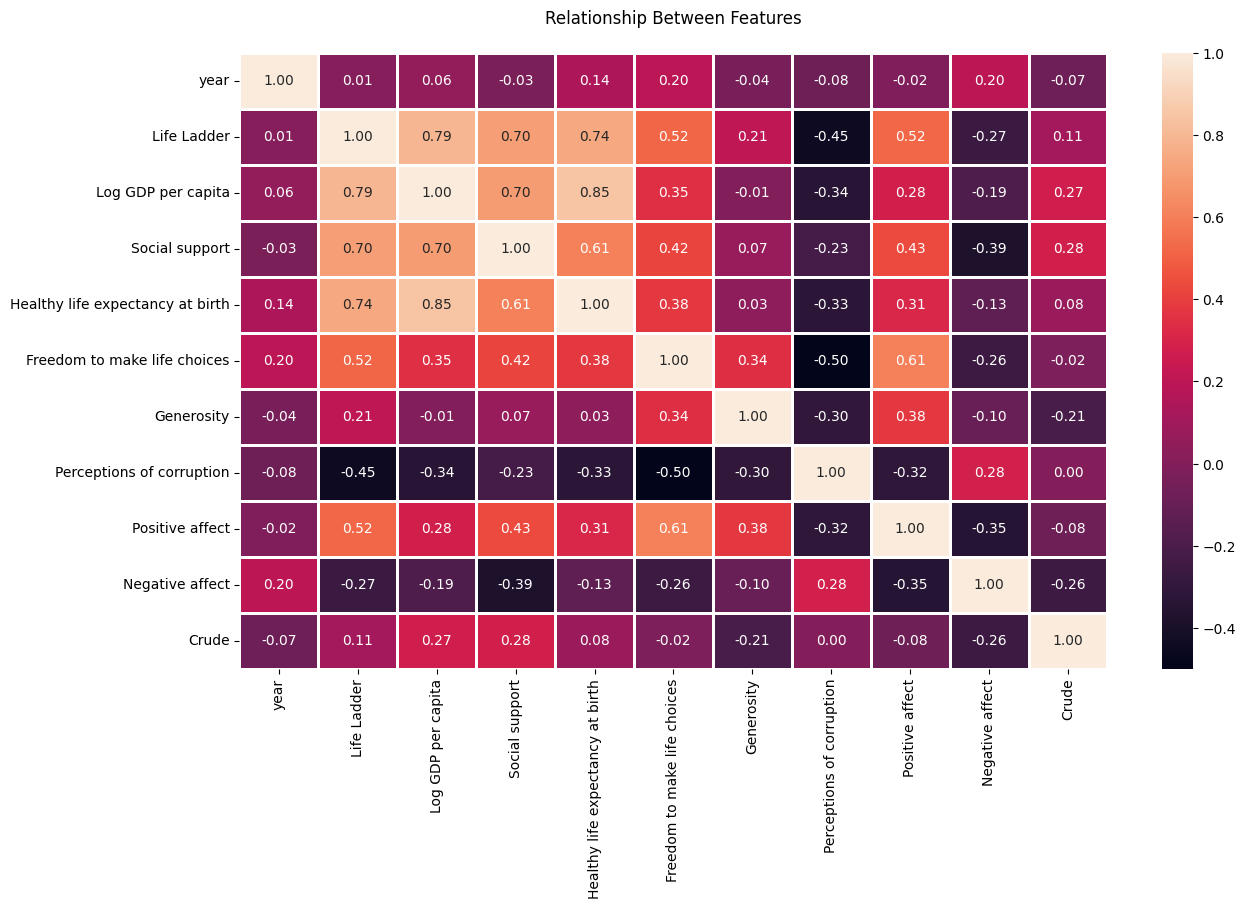

In [175]:
plt.figure(figsize=(14,8))
sns.heatmap(df_WHR_sui_merg.corr(numeric_only=True), annot=True, fmt=".2f", linewidth=2)
plt.title("Relationship Between Features\n")
plt.show()

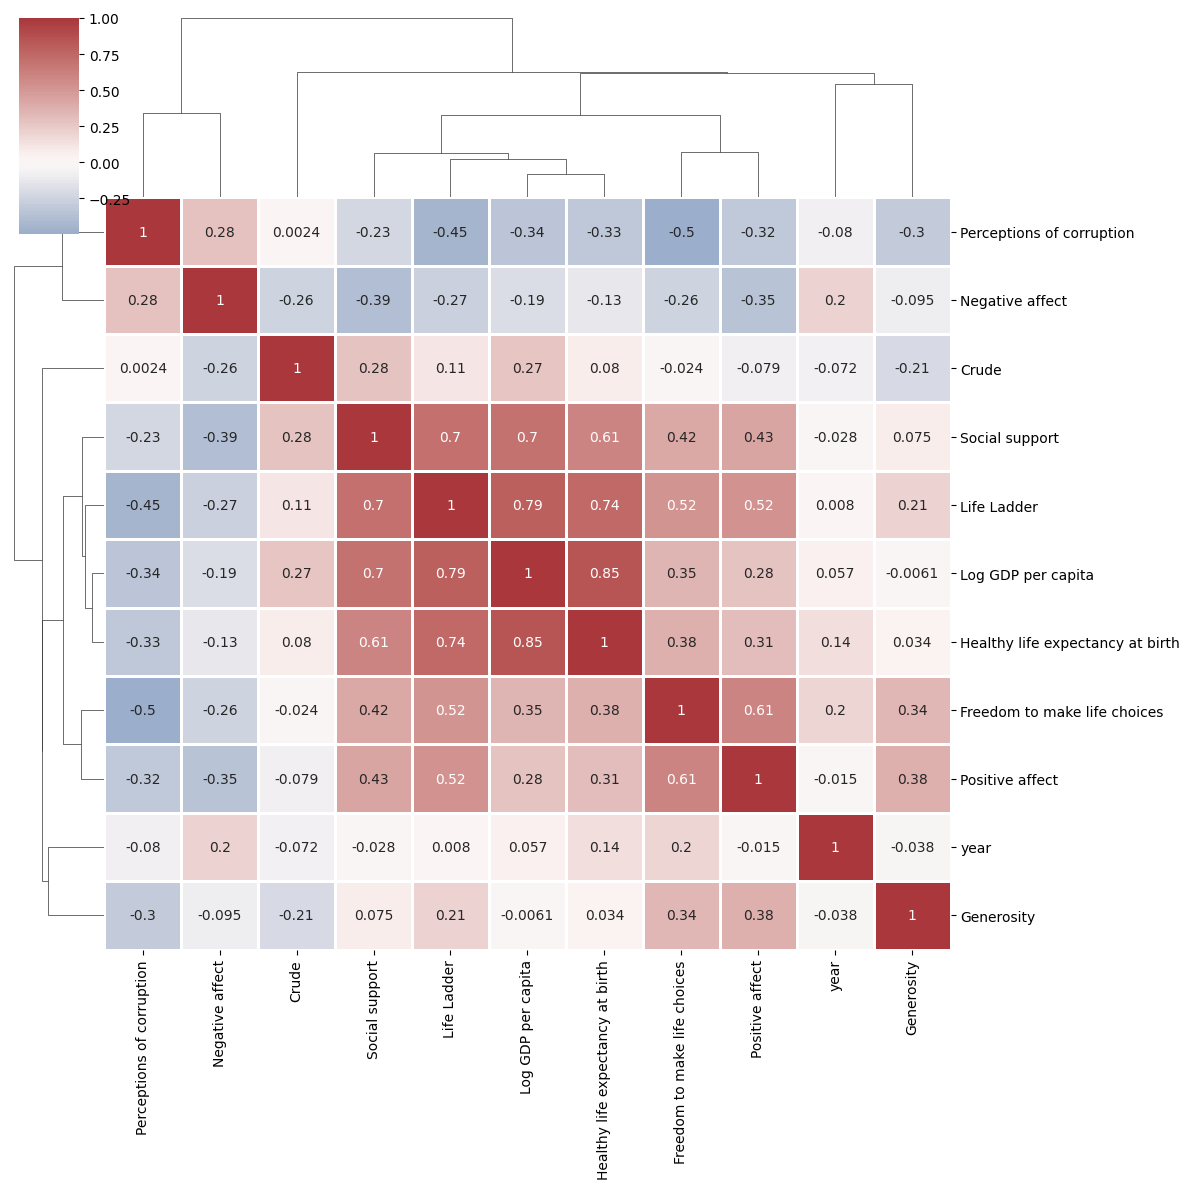

In [176]:
sns.clustermap(df_WHR_sui_merg.corr(numeric_only=True),
               center = 0,
               cmap = "vlag",
               dendrogram_ratio = (0.1, 0.2),
               annot = True,
               linewidths = 2,
               figsize = (12, 12))
plt.show()

In [3]:
import random
import plotly.graph_objects as go
import pandas as pd
import gif

# Pandas DataFrame with random data
df = pd.DataFrame({
    't': list(range(10)) * 10,
    'x': [random.randint(0, 100) for _ in range(100)],
    'y': [random.randint(0, 100) for _ in range(100)]
})

# Gif function definition
@gif.frame
def plot(i):
    d = df[df['t'] == i]
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=d["x"],
        y=d["y"],
        mode="markers"
    ))
    fig.update_layout(width=500, height=300)
    return fig

# Construct list of frames
frames = []
for i in range(10):
    frame = plot(i)
    frames.append(frame)

# Save gif from frames with a specific duration for each frame in ms
gif.save(frames, 'example.gif', duration=100)

### `Note:` Freedom Contirbutes in Happy Countirres but doesn't contribute in Saddest Countries

In [138]:
dfx=pd.merge(
    pd.Series(freedom_ranks_2020['Country name'].unique(),
              name = 'Happy_2020'),
    pd.Series(freedom_ranks_2021['Country name'].unique(),
              name='Happy_2021'),
    left_on='Happy_2020',
    right_on='Happy_2021',
    how='right')

dfx

Happy_2020            Happy_2021
0                    NaN            Uzbekistan
1                 Norway                Norway
2               Cambodia              Cambodia
3                Iceland               Iceland
4                Finland               Finland
5               Slovenia              Slovenia
6                Denmark               Denmark
7                 Sweden                Sweden
8                    NaN               Vietnam
9        Kyrgyz Republic       Kyrgyz Republic
10                   NaN            Costa Rica
11  United Arab Emirates  United Arab Emirates
12           New Zealand           New Zealand
13                 Malta                 Malta
14                   NaN             Singapore
15               Bahrain               Bahrain
16           Switzerland           Switzerland
17           Philippines           Philippines
18                   NaN                Canada
19                   NaN             Australia

In [139]:
freedom_ranks_2019_2021 = freedom_ranks_2019[freedom_ranks_2019['Country name'].isin(freedom_ranks_2021['Country name'])]
len(freedom_ranks_2019_2021['Country name'])/len(freedom_ranks_2021['Country name'])

0.85

In [140]:
dfy=pd.merge(
    pd.Series(freedom_ranks_2019['Country name'],
              name = 'Happy_2019'),
    dfx,
    left_on='Happy_2019',
    right_on='Happy_2021',
    how='right')

dfy

Happy_2019            Happy_2020            Happy_2021
0        Uzbekistan                   NaN            Uzbekistan
1            Norway                Norway                Norway
2          Cambodia              Cambodia              Cambodia
3           Iceland               Iceland               Iceland
4           Finland               Finland               Finland
5          Slovenia              Slovenia              Slovenia
6           Denmark               Denmark               Denmark
7            Sweden                Sweden                Sweden
8           Vietnam                   NaN               Vietnam
9   Kyrgyz Republic       Kyrgyz Republic       Kyrgyz Republic
10       Costa Rica                   NaN            Costa Rica
11              NaN  United Arab Emirates  United Arab Emirates
12      New Zealand           New Zealand           New Zealand
13            Malta                 Malta                 Malta
14        Singapore                   NaN             Singapore
15              NaN               Bahrain               Bahrain
16      Switzerland           Switzerland           Switzerland
17              NaN           Philippines           Philippines
18           Canada                   NaN                Canada
19        Australia                   NaN             Australia

In [141]:
dfz=pd.merge(
    pd.Series(freedom_ranks_2018['Country name'],
              name = 'Happy_2018'),
    dfy,
    left_on='Happy_2018',
    right_on='Happy_2021',
    how='right')

dfz

Happy_2018       Happy_2019            Happy_2020  \
0             Uzbekistan       Uzbekistan                   NaN   
1                 Norway           Norway                Norway   
2               Cambodia         Cambodia              Cambodia   
3                    NaN          Iceland               Iceland   
4                Finland          Finland               Finland   
5               Slovenia         Slovenia              Slovenia   
6                Denmark          Denmark               Denmark   
7                 Sweden           Sweden                Sweden   
8                    NaN          Vietnam                   NaN   
9        Kyrgyz Republic  Kyrgyz Republic       Kyrgyz Republic   
10            Costa Rica       Costa Rica                   NaN   
11  United Arab Emirates              NaN  United Arab Emirates   
12           New Zealand      New Zealand           New Zealand   
13                 Malta            Malta                 Malta   
14             Singapore        Singapore                   NaN   
15                   NaN              NaN               Bahrain   
16           Switzerland      Switzerland           Switzerland   
17           Philippines              NaN           Philippines   
18                Canada           Canada                   NaN   
19             Australia        Australia                   NaN   

              Happy_2021  
0             Uzbekistan  
1                 Norway  
2               Cambodia  
3                Iceland  
4                Finland  
5               Slovenia  
6                Denmark  
7                 Sweden  
8                Vietnam  
9        Kyrgyz Republic  
10            Costa Rica  
11  United Arab Emirates  
12           New Zealand  
13                 Malta  
14             Singapore  
15               Bahrain  
16           Switzerland  
17           Philippines  
18                Canada  
19             Australia

In [65]:
freedom_ranks_2021[freedom_ranks_2021['Country name'] == 'Malta']

NameError: name 'freedom_ranks_2021' is not defined

In [143]:
Malta = df_WHB[df_WHB.year == 2020 ].sort_values(['Freedom to make life choices'],ascending= False).reset_index()

In [144]:
Malta[Malta ['Country name'] == 'Malta' ] 

index Country name  year  Life Ladder  Log GDP per capita  Social support  \
13   1087        Malta  2020        6.157                 NaN           0.938   

    Healthy life expectancy at birth  Freedom to make life choices  \
13                              72.2                         0.931   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  
13         NaN                      0.675            0.601            0.411

In [145]:
freedom_ranks_2020

Country name  year
0                 Norway  2020
1               Cambodia  2020
2                Finland  2020
3               Slovenia  2020
4                Estonia  2020
5                 Sweden  2020
6                Iceland  2020
7                Bahrain  2020
8   United Arab Emirates  2020
9                Denmark  2020
10       Kyrgyz Republic  2020
11           Netherlands  2020
12           Philippines  2020
13                 Malta  2020
14           El Salvador  2020
15           New Zealand  2020
16           Switzerland  2020
17                  Laos  2020
18              Portugal  2020
19               Austria  2020